## Train data(new radiator)

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

file_path = '/content/Manchester University Data Sheet - Mar 2025.xlsx'

excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
print("Sheet names:", sheet_names)

sheet_name = sheet_names[0]
train = pd.read_excel(file_path, sheet_name=sheet_name)
train

### Drop those colums we are not using

In [84]:

columns_to_drop = ["Product ID", "Name", "Family", "Material"]
train = train.drop(columns=columns_to_drop)

In [85]:
print(train.dtypes)

Section length        float64
Leg section depth     float64
Mid section Depth      object
Leg section height      int64
Mid section height      int64
Leg section weight    float64
Mid section weight    float64
Internal volume       float64
Interaxis distance      int64
Nipple size            object
Output ΔT50           float64
Factor Km             float64
Exponent n            float64
Surface area           object
dtype: object


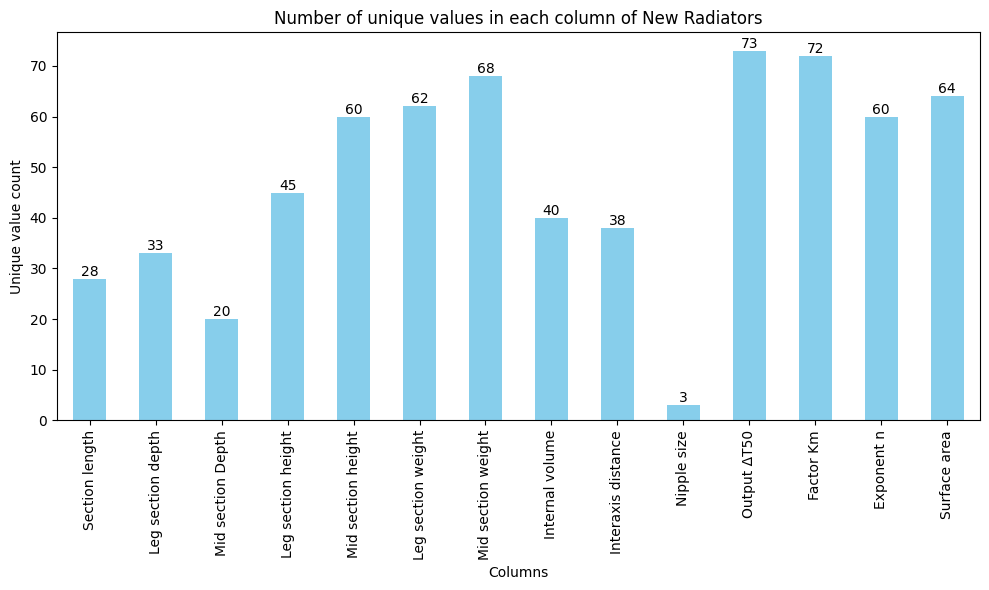

In [86]:
import matplotlib.pyplot as plt

# number of unique values in each column
uniqueValues = train.nunique()

plt.figure(figsize=(10, 6))
ax = uniqueValues.plot(kind='bar', color='skyblue')
for patch in ax.patches: # count on top of each bar
    height= patch.get_height()
    width=patch.get_width()
    ax.text(patch.get_x() + width / 2,height,
            f'{int(patch.get_height())}', ha='center', va='bottom')

plt.title('Number of unique values in each column of New Radiators')
plt.xlabel('Columns')
plt.ylabel('Unique value count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [87]:
#unique values in categorical columsn for new radiators
print("Unique values in categorical columns:")
for col in train.select_dtypes(include=['object']).columns:
    print(train[col].value_counts())
    print('\n')

Unique values in categorical columns:
Mid section Depth
Missing data    26
71.3             8
144              5
101              4
114              4
221              4
90               3
150              3
210              3
70               3
140.2            3
140              3
215              2
181              2
99               2
224              2
186              1
179              1
227              1
92               1
Name: count, dtype: int64


Nipple size
1.25"    49
1.5"     29
1"        3
Name: count, dtype: int64


Surface area
0.203    4
0.146    3
0.216    2
0.124    2
0.097    2
        ..
0.173    1
0.247    1
0.255    1
0.398    1
0.306    1
Name: count, Length: 64, dtype: int64




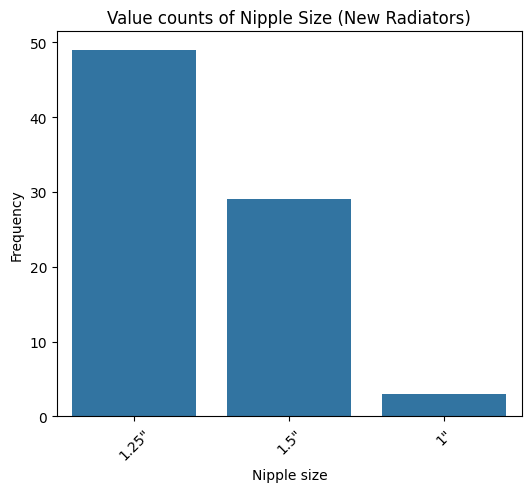

In [88]:
# value counts for 'Nipple size'
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.countplot(x=train['Nipple size'], order=train['Nipple size'].value_counts().index)
plt.title("Value counts of Nipple Size (New Radiators)")
plt.xlabel('Nipple size')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Missing data

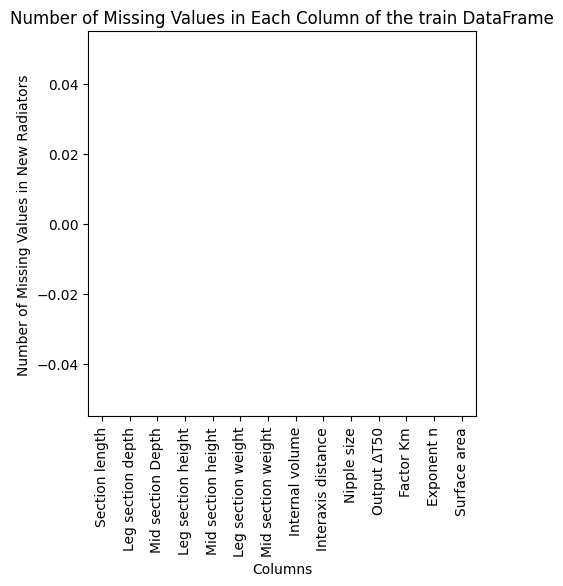

In [89]:
missing_values = train.isnull().sum()
plt.figure(figsize=(5, 5))
missing_values.plot(kind='bar')
plt.title('Number of Missing Values in Each Column of the train DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values in New Radiators')
plt.xticks(rotation=90)
plt.show()

In [90]:
# Missing data
train['Mid section Depth'] = train.apply(lambda row: row['Leg section depth'] if row['Mid section Depth'] == 'Missing data' else row['Mid section Depth'], axis=1)
train['Surface area'] = train['Surface area'].replace('Missing data', 0.29)

### Convert every column into float

In [91]:
# convert to float
train['Surface area'] = train['Surface area'].astype(float)
train['Nipple size'] = train['Nipple size'].str.replace('"', '').astype(float)

In [92]:
print(train.dtypes)

Section length        float64
Leg section depth     float64
Mid section Depth     float64
Leg section height      int64
Mid section height      int64
Leg section weight    float64
Mid section weight    float64
Internal volume       float64
Interaxis distance      int64
Nipple size           float64
Output ΔT50           float64
Factor Km             float64
Exponent n            float64
Surface area          float64
dtype: object


### Convert mm to dm to ensures consistency and prevents unit mismatches

In [93]:
# convert to decimeters
train['Section length'] = train['Section length'] / 100
train['Leg section depth'] = train['Leg section depth'] / 100
train['Mid section Depth'] = train['Mid section Depth'] / 100
train['Leg section height'] = train['Leg section height'] / 100
train['Mid section height'] = train['Mid section height'] / 100
train['Nipple size'] = train['Nipple size'] * 25.4 / 100

In [94]:
train.head()

Section length  Leg section depth  Mid section Depth  Leg section height  \
0           0.665                1.1                0.9                4.65   
1           0.665                1.1                0.9                6.65   
2           0.665                1.1                0.9                8.65   
3           0.665                1.7                1.5                4.70   
4           0.665                1.7                1.5                6.70   

   Mid section height  Leg section weight  Mid section weight  \
0                4.07                3.50                3.22   
1                6.07                4.80                4.53   
2                8.07                6.39                6.08   
3                4.13                5.30                4.25   
4                6.13                7.29                6.27   

   Internal volume  Interaxis distance  Nipple size  Output ΔT50  Factor Km  \
0             0.60                 323       0.3175         44.5    0.32774   
1             0.80                 523       0.3175         62.4    0.45159   
2             0.93                 723       0.3175         79.1    0.54217   
3             1.05                 323       0.3175         60.9    0.41656   
4             1.49                 523       0.3175         86.9    0.61853   

   Exponent n  Surface area  
0      1.2554         0.111  
1      1.2598         0.153  
2      1.2737         0.196  
3      1.2742         0.151  
4      1.2642         0.216

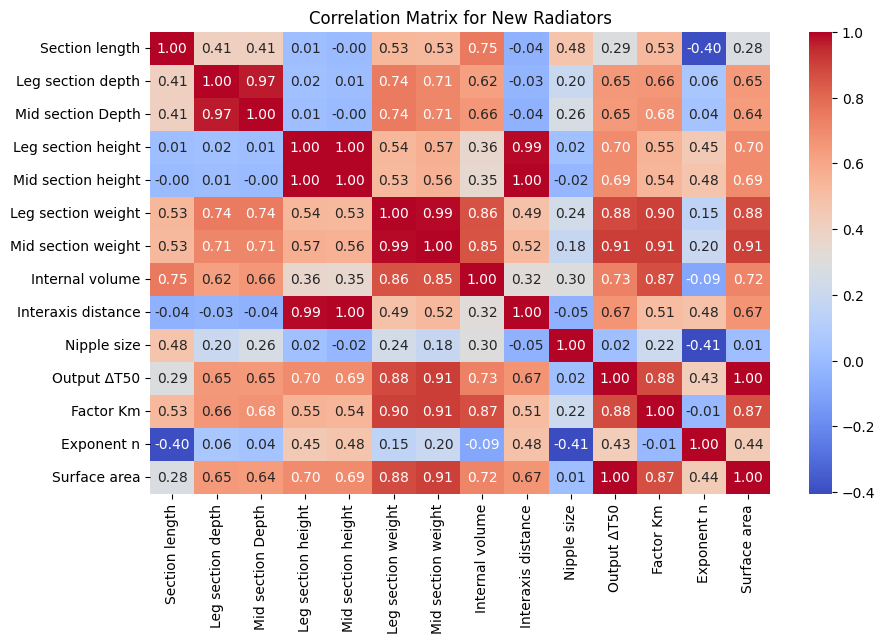

In [95]:
#heatmap shwoing correaltion
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for New Radiators")
plt.show()

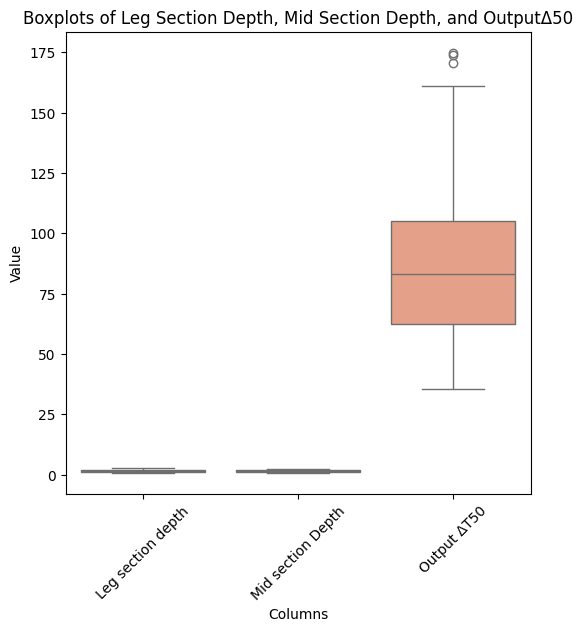

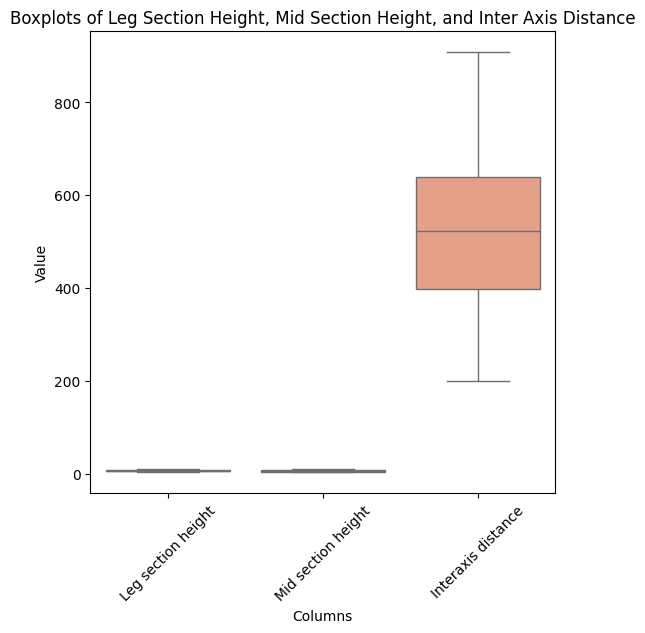

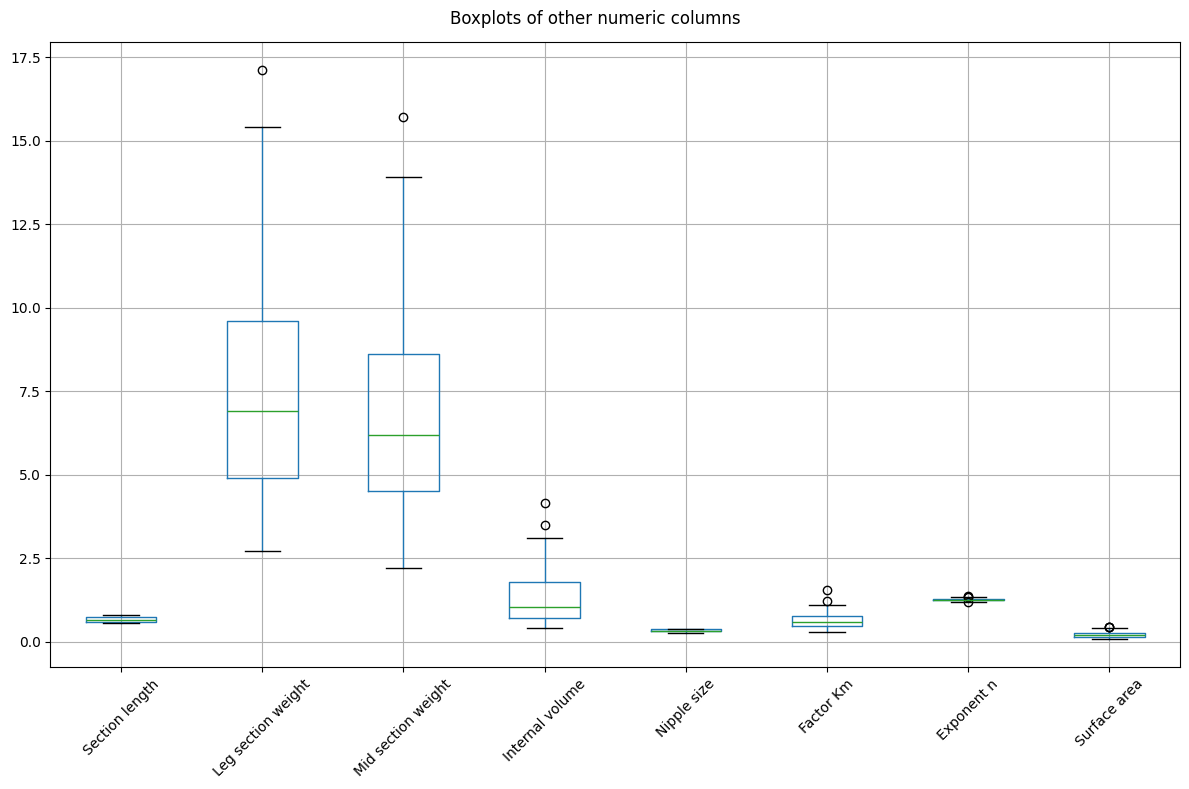

In [96]:
#boxplots

#we make three sets of boxplots since the distributions are significantly different
#this leads to better underatnding and visaulisations

colList1 = ['Leg section depth', 'Mid section Depth', 'Output ΔT50']

# Plot boxplots for 'Leg section depth', 'Mid section Depth', 'Output ΔT50'
plt.figure(figsize=(6, 6))
sns.boxplot(data=train[colList1], palette='coolwarm')
plt.title('Boxplots of Leg Section Depth, Mid Section Depth, and OutputΔ50')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

colList2 = ['Leg section height', 'Mid section height', 'Interaxis distance']
#boxplots for 'Leg section height', 'Mid section height', 'Interaxis distance'
plt.figure(figsize=(6, 6))
sns.boxplot(data=train[colList2], palette='coolwarm')
plt.title('Boxplots of Leg Section Height, Mid Section Height, and Inter Axis Distance')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

#boxplots for all other numeric columns
plt.figure(figsize=(12, 8))
toDrop=colList2 + colList1
train.drop(columns=toDrop).boxplot()
plt.suptitle("Boxplots of other numeric columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

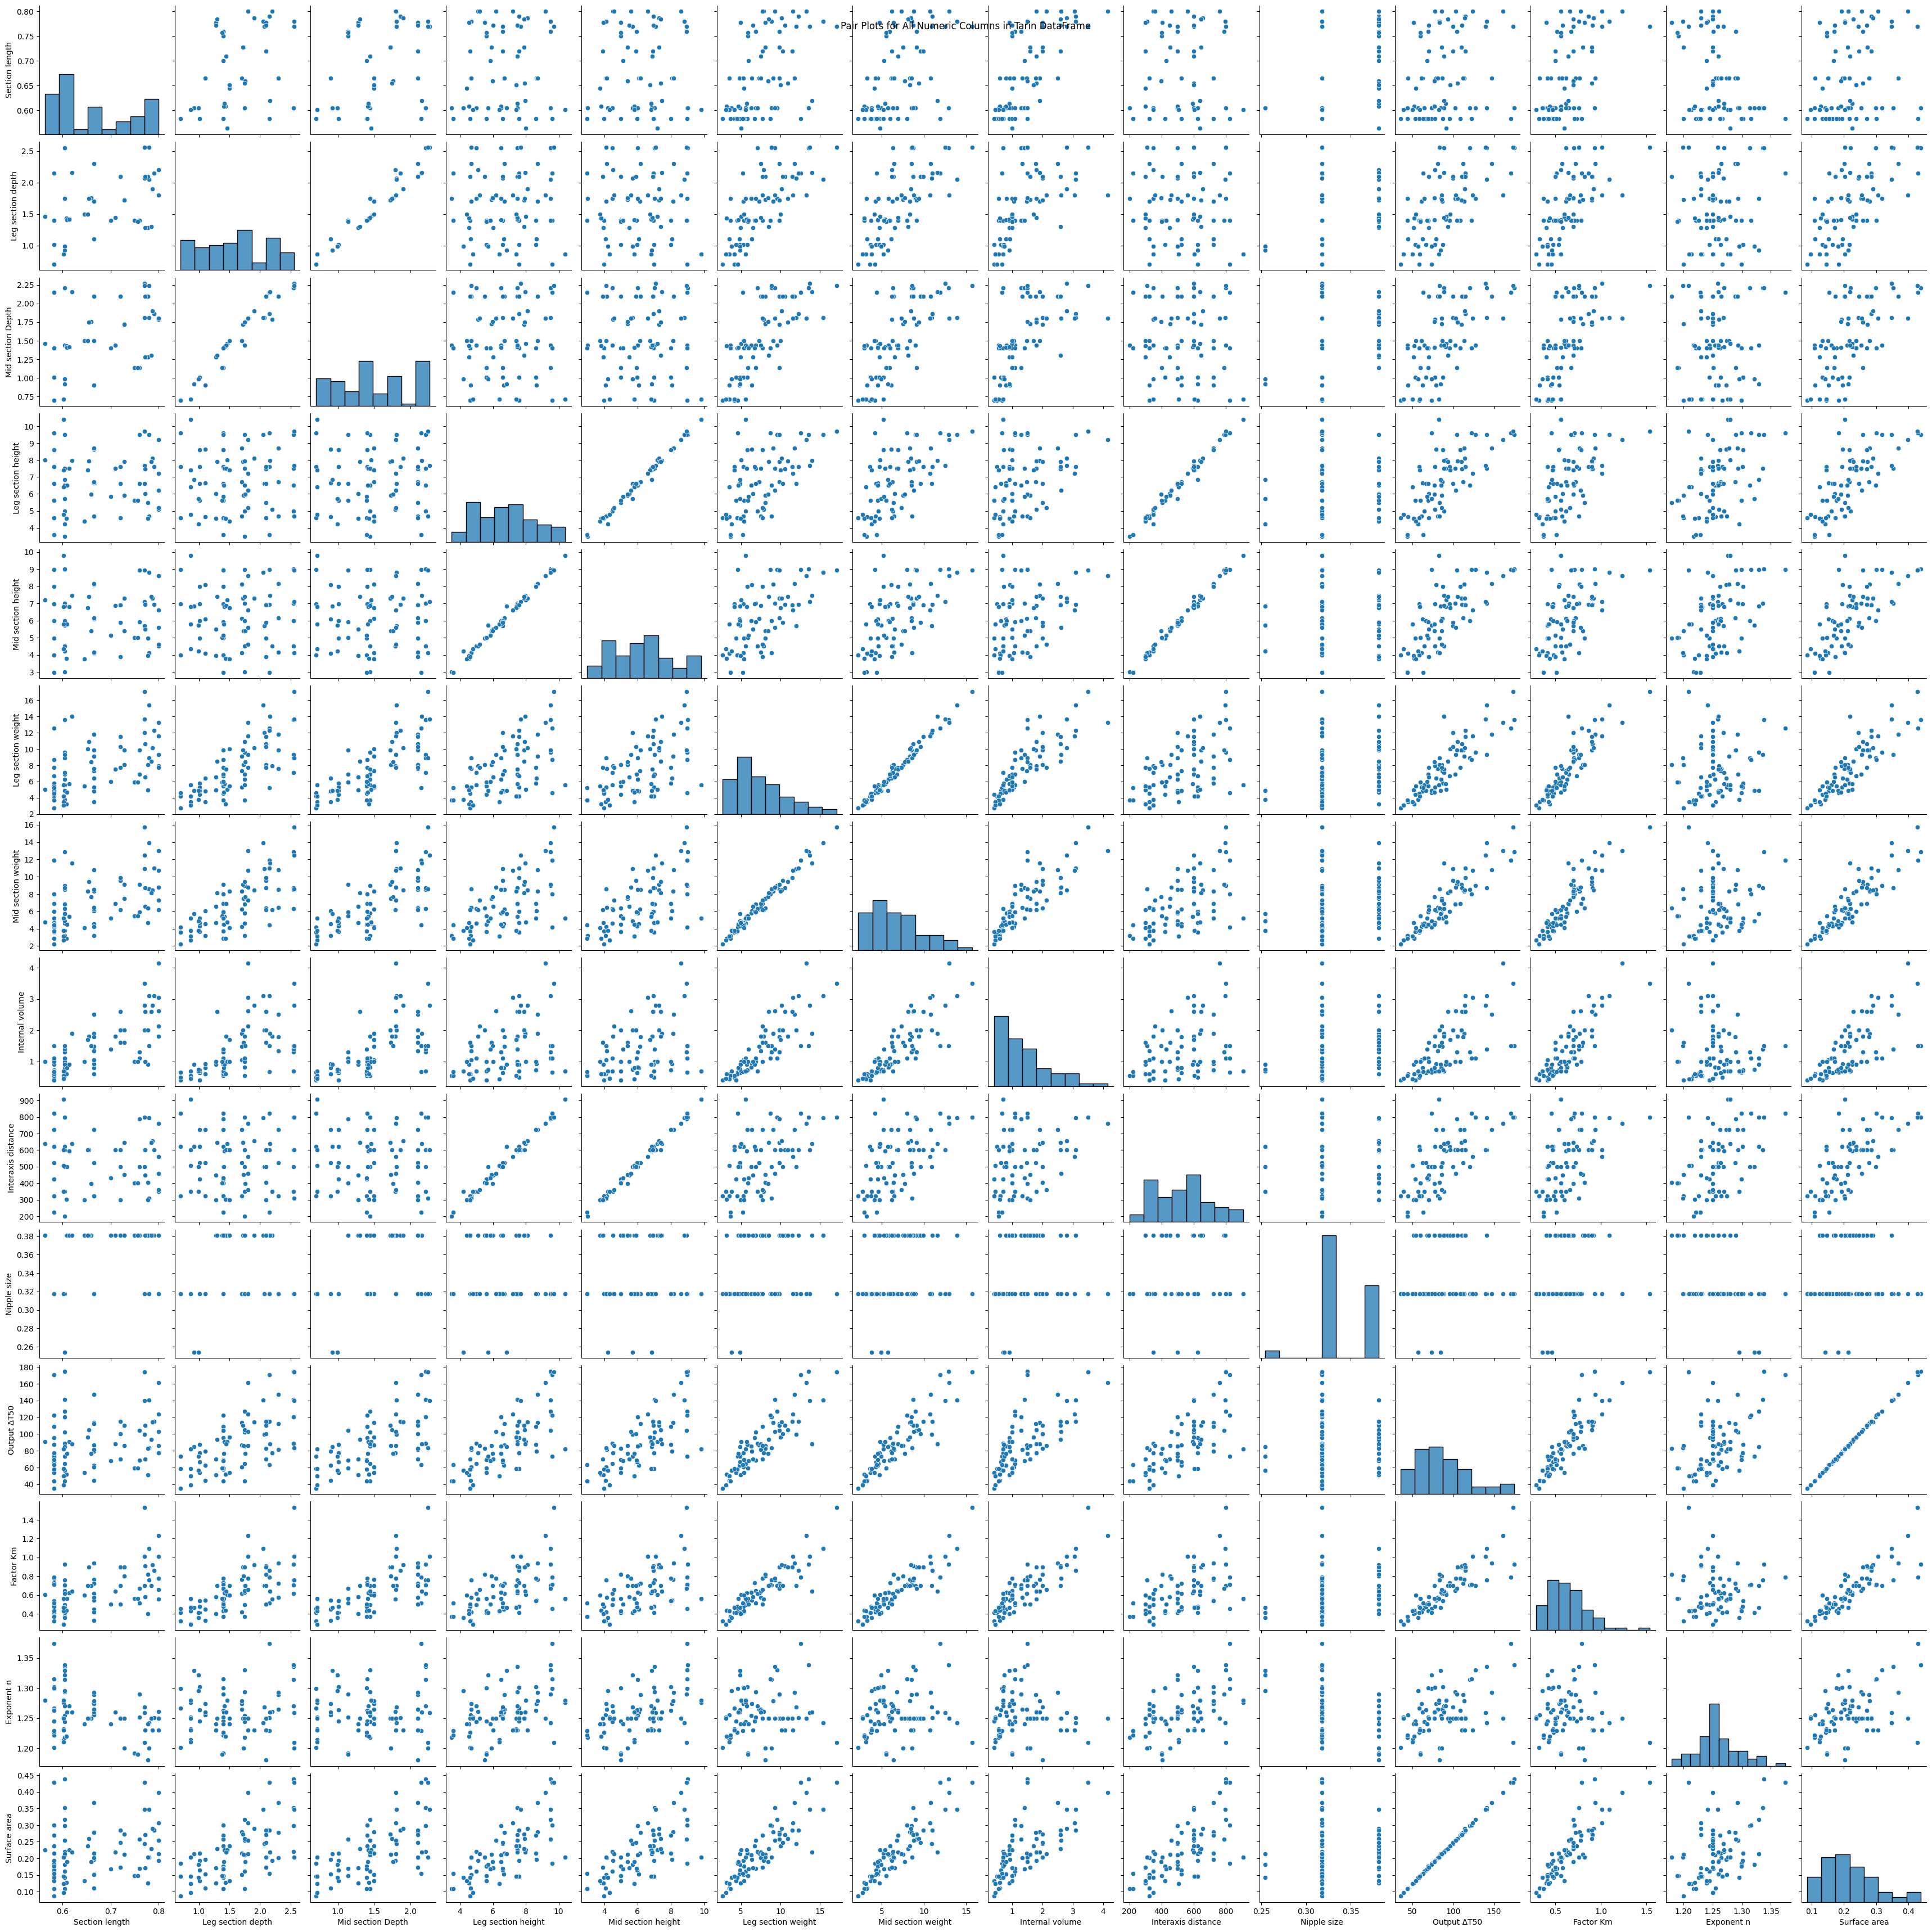

In [97]:
# pairplot for numeric columsn in train
import seaborn as sns
import numpy as np
numericCols = train.select_dtypes(include=[np.number])
sns.pairplot(numericCols)
plt.suptitle('Pair Plots for All Numeric Columns in Tarin DataFrame')
plt.show()

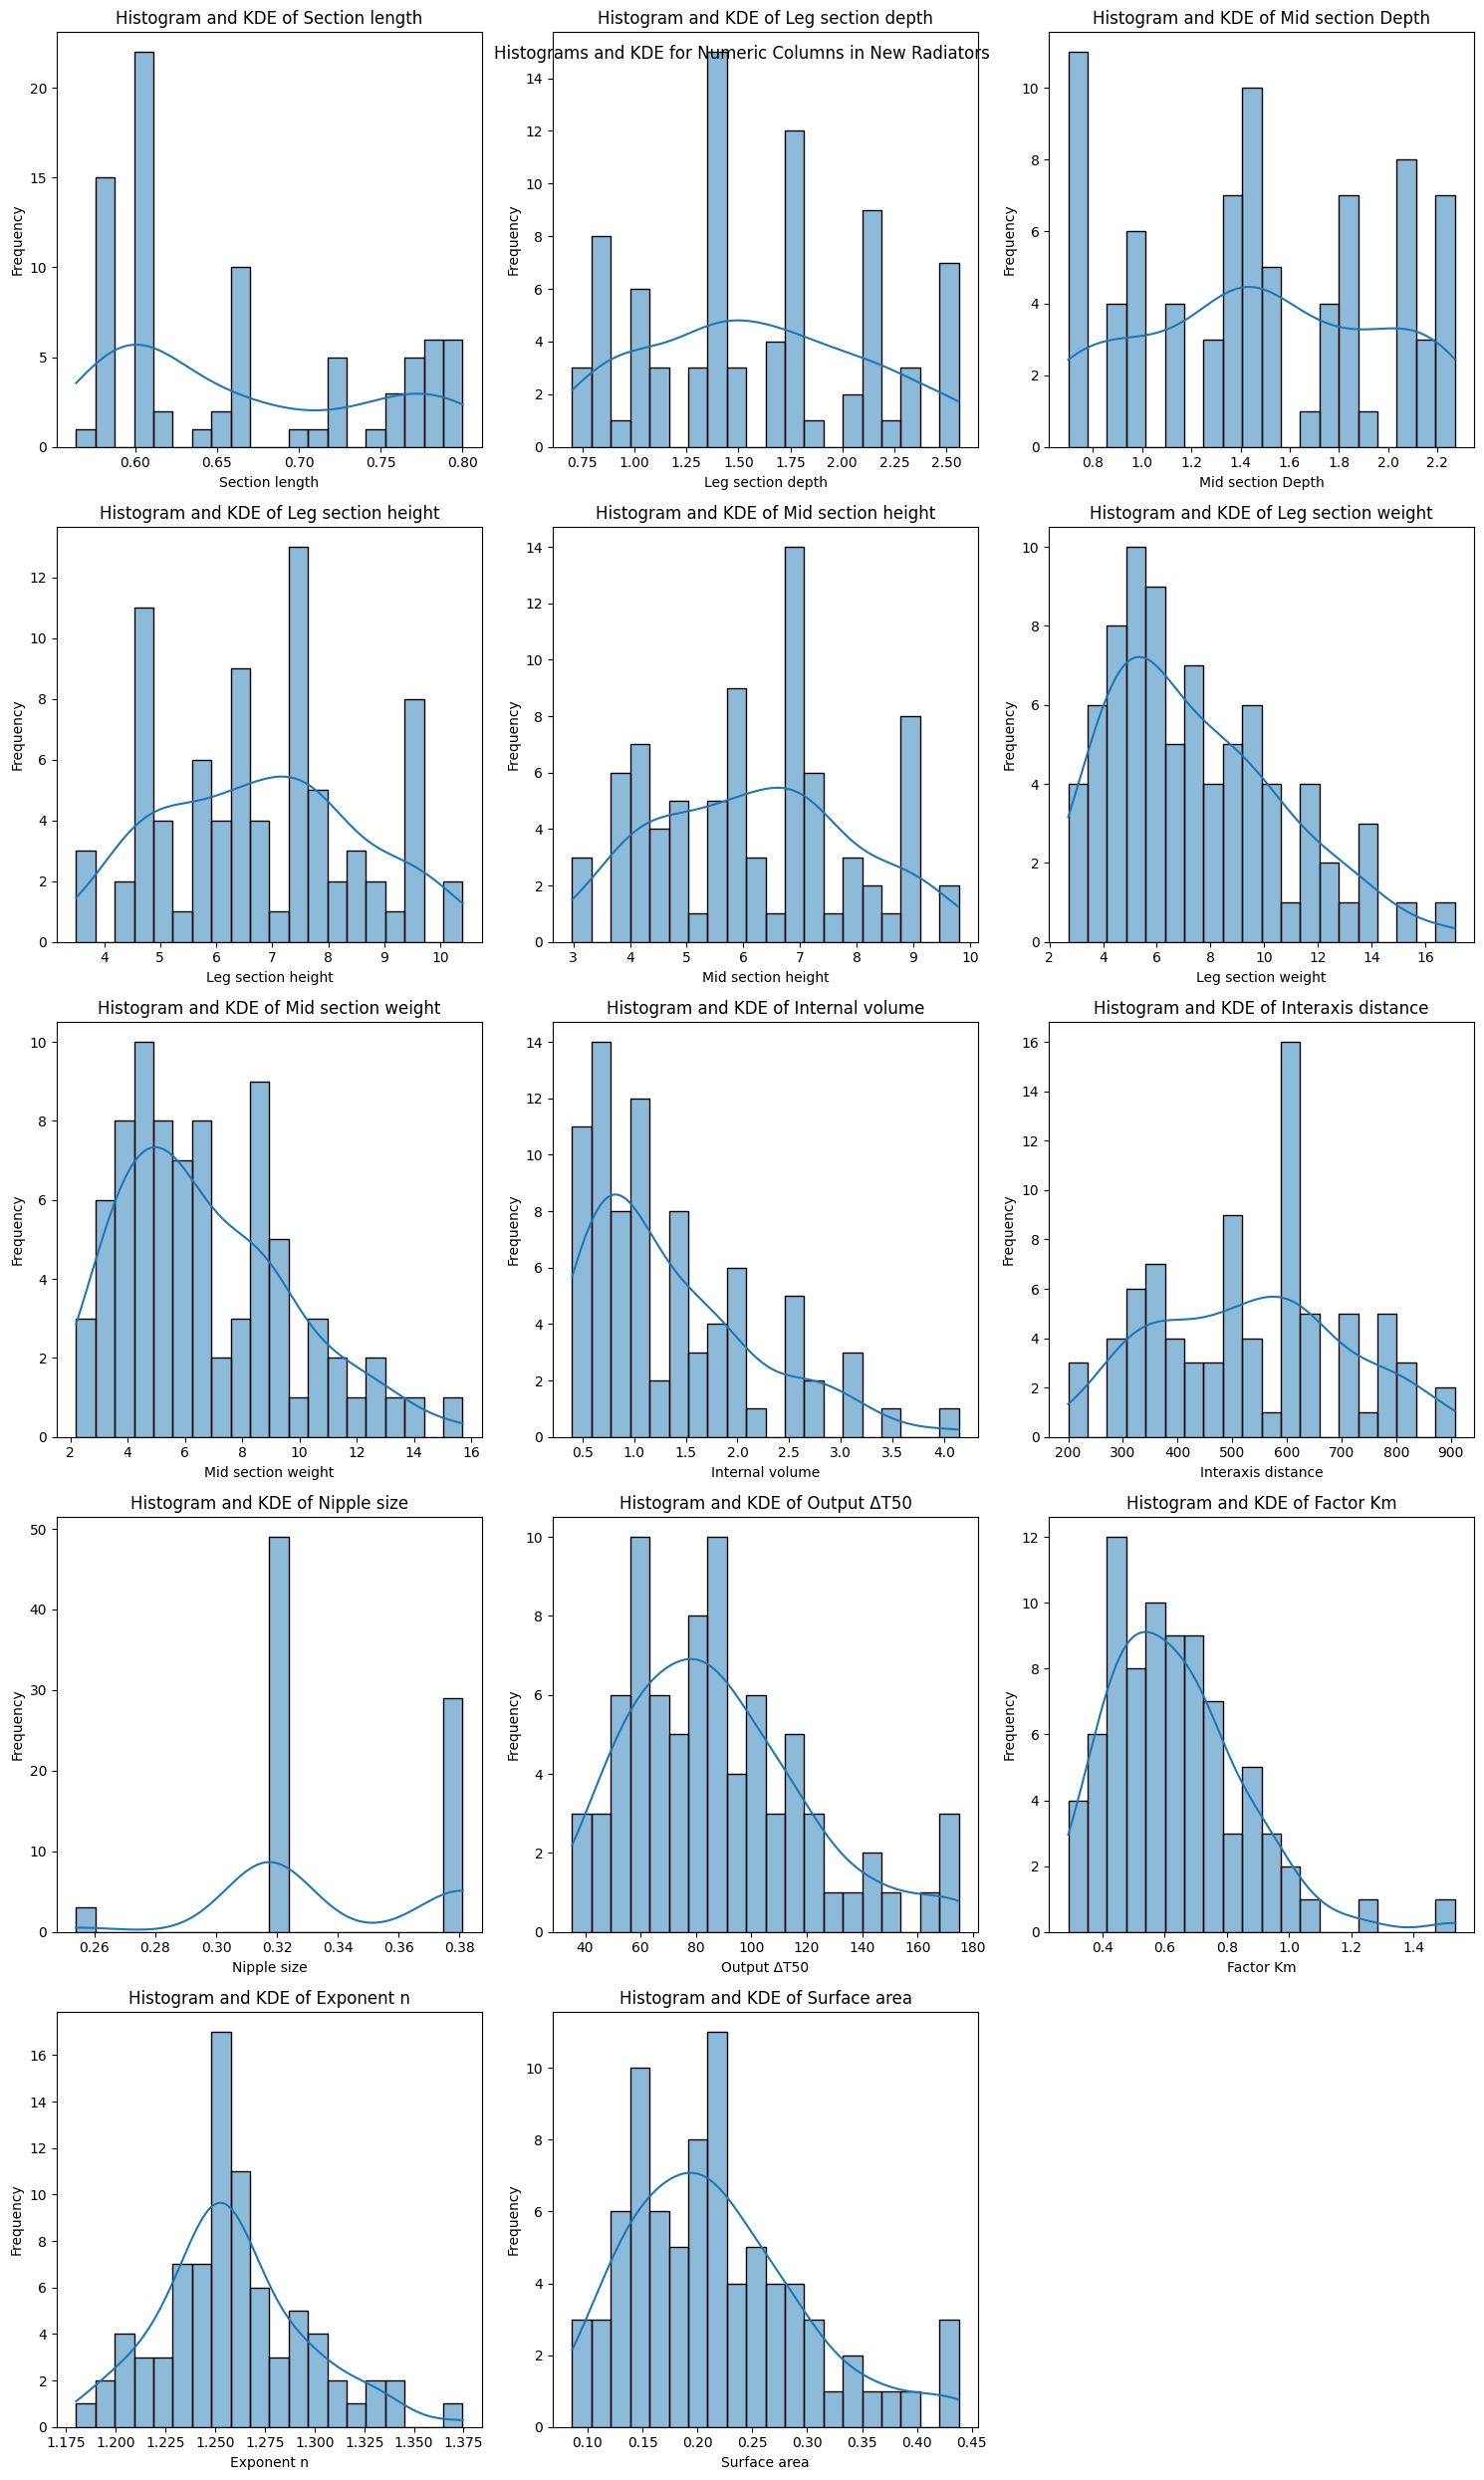

In [98]:
numplots = len(numericCols.columns)
cols = 3
rows=np.ceil(numplots / cols)
rows = int(rows)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Create a grid
axes = axes.flatten()

for i, col in enumerate(numericCols.columns):
    sns.histplot(numericCols[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram and KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):  # hiding unused subplots
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Histograms and KDE for Numeric Columns in New Radiators')
plt.show()

In [99]:
medianValues = numericCols.median()
modeValues = numericCols.mode().iloc[0]  # we take first mode if there are multiple
print("Median Values for Each Column:")
print(medianValues)
print('\n')
print("Mode Values for Each Column:")
print(modeValues)

Median Values for Each Column:
Section length          0.6450
Leg section depth       1.5000
Mid section Depth       1.4400
Leg section height      6.6500
Mid section height      6.0700
Leg section weight      6.9000
Mid section weight      6.1800
Internal volume         1.0500
Interaxis distance    523.0000
Nipple size             0.3175
Output ΔT50            83.2000
Factor Km               0.6020
Exponent n              1.2511
Surface area            0.2030
dtype: float64


Mode Values for Each Column:
Section length          0.5830
Leg section depth       0.8600
Mid section Depth       0.7130
Leg section height      7.6000
Mid section height      8.9800
Leg section weight      3.5000
Mid section weight      3.8000
Internal volume         1.0000
Interaxis distance    600.0000
Nipple size             0.3175
Output ΔT50            39.1000
Factor Km               0.7000
Exponent n              1.2500
Surface area            0.2030
Name: 0, dtype: float64


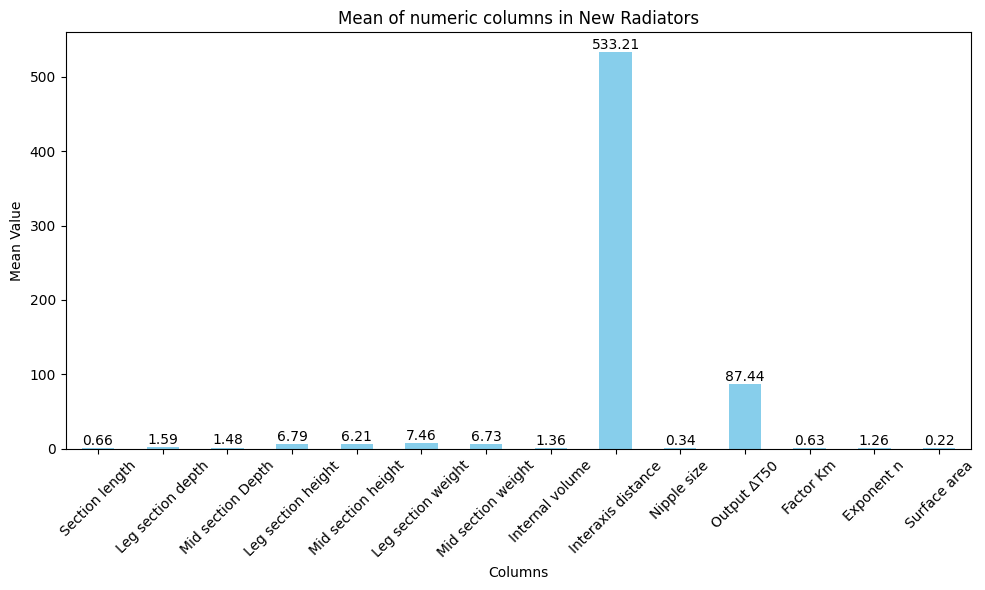

In [100]:
meanValues = numericCols.mean()  #calculating means

plt.figure(figsize=(10, 6))
ax = meanValues.plot(kind='bar', color='skyblue')

for patch in ax.patches: #value labels on top of each bar
    height = patch.get_height()
    width=patch.get_width()
    ax.text(patch.get_x() + width/ 2, height + 0.05, f'{height:.2f}',
            ha='center', va='bottom')
plt.title('Mean of numeric columns in New Radiators')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Test data (old radiator)

In [101]:
import pandas as pd

file_path = 'Manchester University Data Sheet - Mar 2025.xlsx'

excel_file = pd.ExcelFile(file_path)
sheet_names = excel_file.sheet_names
print("Sheet names:", sheet_names)

sheet_name = sheet_names[1]
test = pd.read_excel(file_path, sheet_name=sheet_name)
test

Sheet names: ['New radiators (Gold standard )', 'Old radiators (Silver standard ', 'Heat output formula', 'Anatomy of a radiator']


Product ID                                               Name  \
0     ORC-ARC-AFW-13   American Radiator Company Aetna Flue Window 13in   
1     ORC-ARC-AFW-14   American Radiator Company Aetna Flue Window 14in   
2     ORC-ARC-AFW-16   American Radiator Company Aetna Flue Window 16in   
3     ORC-ARC-AFW-18   American Radiator Company Aetna Flue Window 18in   
4     ORC-ARC-AFW-20   American Radiator Company Aetna Flue Window 20in   
..               ...                                                ...   
360         ORC-C-36                                        Church 36in   
361         ORC-C-38                                        Church 38in   
362      ORC-W-29-40                               Wave 29in H x 40in W   
363      ORC-W-37-40                               Wave 37in H x 40in W   
364  ORC-ARC-PF-2C23  American Radiator Company Perfection 2 Column ...   

      Style      Family    Construction types   Material  Section length  \
0    Church  Aetna Flue      Threaded nipples  Cast iron              76   
1    Church  Aetna Flue      Threaded nipples  Cast iron              76   
2    Church  Aetna Flue      Threaded nipples  Cast iron              76   
3    Church  Aetna Flue      Threaded nipples  Cast iron              76   
4    Church  Aetna Flue      Threaded nipples  Cast iron              76   
..      ...         ...                   ...        ...             ...   
360  Church      Church  Manifold top, bottom  Cast iron              77   
361  Church      Church  Manifold top, bottom  Cast iron             102   
362  Church      Church  Manifold top, bottom  Cast iron            1016   
363  Church      Church  Manifold top, bottom  Cast iron            1016   
364  Ornate    National       Conical nipples  Cast iron              64   

     Leg section depth  Mid section depth  Leg section height  ...  \
0                  318                318                 330  ...   
1                  318                318                 356  ...   
2                  318                318                 406  ...   
3                  318                318                 457  ...   
4                  318                318                 508  ...   
..                 ...                ...                 ...  ...   
360                102                102                 508  ...   
361                102                102                 508  ...   
362                178                178                 737  ...   
363                178                178                 940  ...   
364                235                184                 584  ...   

     Mid section weight  Heating surface  Heating surface is sq ft  \
0                   6.0         0.340642                  3.666667   
1                   6.5         0.371609                         4   
2                   7.4         0.433544                  4.666667   
3                   8.3         0.495479                  5.333333   
4                   9.3         0.557414                         6   
..                  ...              ...                       ...   
360                 4.2    Not available             Not available   
361                 4.5    Not available             Not available   
362                70.0    Not available             Not available   
363                90.0    Not available             Not available   
364                 6.8         0.216772                  2.333333   

    Internal volume L Internal volume lb Interaxis distance Nipple size - Top  \
0                   2      Not available              210.0              1.5"   
1                2.15      Not available              233.0              1.5"   
2                2.46      Not available              286.0              1.5"   
3                2.77      Not available              333.0              1.5"   
4                3.07      Not available              384.0              1.5"   
..                ...       

In [102]:
test.describe()

Section length  Leg section depth  Mid section depth  \
count      365.000000         365.000000         365.000000   
mean        80.917808         188.473973         177.213699   
std         88.964117          69.146862          66.963442   
min          0.000000          51.000000          51.000000   
25%         64.000000         140.000000         121.000000   
50%         64.000000         190.000000         187.000000   
75%         76.000000         241.000000         225.000000   
max       1016.000000         337.000000         337.000000   

       Leg section height  Mid section height  Leg section weight  \
count          365.000000          365.000000          365.000000   
mean           709.838356          654.112329            9.986795   
std            208.748583          203.892805            6.732845   
min            330.000000          250.000000            2.400000   
25%            508.000000          496.000000            6.700000   
50%            660.000000          610.000000            8.700000   
75%            914.000000          848.000000           12.000000   
max           1143.000000         1092.000000           90.000000   

       Mid section weight  Interaxis distance  Output ΔT50  
count          365.000000          364.000000    365.00000  
mean             9.040959          534.637363    123.30137  
std              6.562663          220.414199     90.37995  
min              2.200000            0.000000     32.00000  
25%              6.000000          346.000000     83.00000  
50%              7.900000          497.000000    110.00000  
75%             10.800000          726.250000    144.00000  
max             90.000000         1006.000000   1172.00000

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Product ID                365 non-null    object 
 1   Name                      365 non-null    object 
 2   Style                     365 non-null    object 
 3   Family                    365 non-null    object 
 4   Construction types        365 non-null    object 
 5   Material                  365 non-null    object 
 6   Section length            365 non-null    int64  
 7   Leg section depth         365 non-null    int64  
 8   Mid section depth         365 non-null    int64  
 9   Leg section height        365 non-null    int64  
 10  Mid section height        365 non-null    int64  
 11  Leg section weight        365 non-null    float64
 12  Mid section weight        365 non-null    float64
 13  Heating surface           365 non-null    object 
 14  Heating su

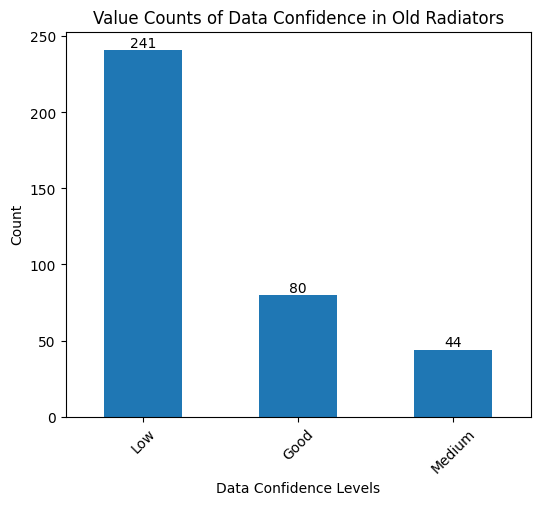

In [104]:

# plot fro value counts of the 'Data confidence' column
dataConfidenceCounts = test['Data confidence'].value_counts()

# Plot the value counts
plt.figure(figsize=(6, 5))
dataConfidenceCounts.plot(kind='bar')

for i, value in enumerate(dataConfidenceCounts):
    plt.text(i, value + 0.01, str(value), ha='center', va='bottom')

plt.title('Value Counts of Data Confidence in Old Radiators')
plt.xlabel('Data Confidence Levels')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [105]:
# Select only the specified columns
columns_to_keep = [
    "Section length", "Leg section depth", "Mid section depth", "Leg section height", "Mid section height",
    "Leg section weight", "Mid section weight","Heating surface", "Internal volume L", "Interaxis distance",
    "Nipple size - Top", "Nipple size - Bottom", "Output ΔT50"
]
test = test[columns_to_keep]

In [106]:
print(test.dtypes)

Section length            int64
Leg section depth         int64
Mid section depth         int64
Leg section height        int64
Mid section height        int64
Leg section weight      float64
Mid section weight      float64
Heating surface          object
Internal volume L        object
Interaxis distance      float64
Nipple size - Top        object
Nipple size - Bottom     object
Output ΔT50               int64
dtype: object


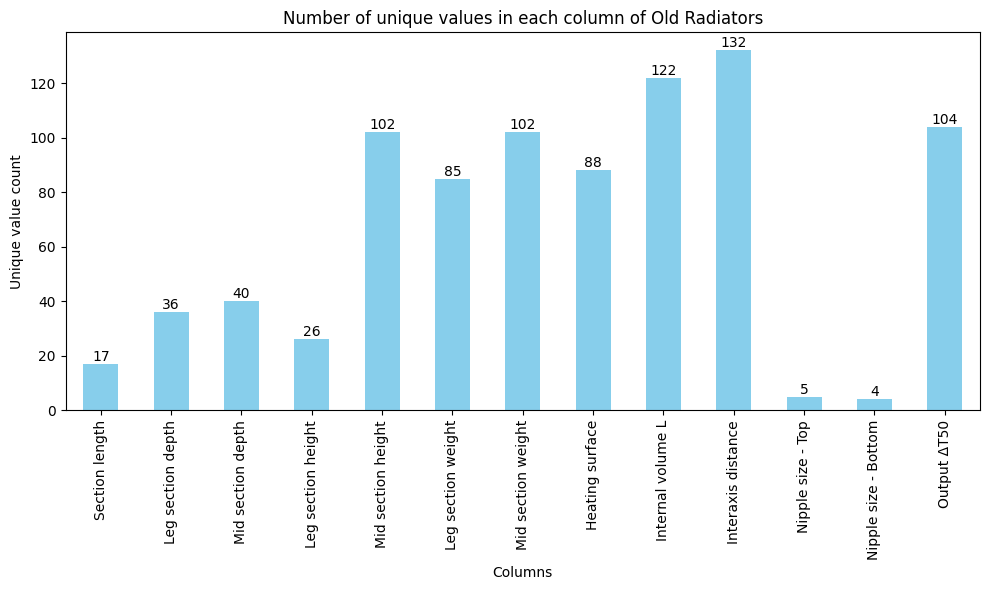

In [107]:
# number of unique values in each column
uniqueValues = test.nunique()

plt.figure(figsize=(10, 6))
ax = uniqueValues.plot(kind='bar', color='skyblue')
for patch in ax.patches: # count on top of each bar
    height= patch.get_height()
    width=patch.get_width()
    ax.text(patch.get_x() + width / 2,height,
            f'{int(patch.get_height())}', ha='center', va='bottom')

plt.title('Number of unique values in each column of Old Radiators')
plt.xlabel('Columns')
plt.ylabel('Unique value count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [108]:
print(test.dtypes)

Section length            int64
Leg section depth         int64
Mid section depth         int64
Leg section height        int64
Mid section height        int64
Leg section weight      float64
Mid section weight      float64
Heating surface          object
Internal volume L        object
Interaxis distance      float64
Nipple size - Top        object
Nipple size - Bottom     object
Output ΔT50               int64
dtype: object


In [109]:
#this shows how many heating surface values we have
# value counts of the 'Heating surface' column

heatingSurfaceCounts = test['Heating surface'].value_counts()
notAvailableCount = heatingSurfaceCounts.get('Not available')
print(notAvailableCount)

42


In [110]:
df = test.drop(['Heating surface', 'Internal volume L'], axis=1, errors='ignore') #these 2 have a lot unique categorical values
print("Unique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())
    print('\n')

Unique values in categorical columns:
Nipple size - Top
2"       167
1.25"    103
1.5"      57
1"        26
0         12
Name: count, dtype: int64


Nipple size - Bottom
2"       212
1.25"    116
1"        25
1.5"      12
Name: count, dtype: int64




### Missing data except Heating Surface and Internal Volume L

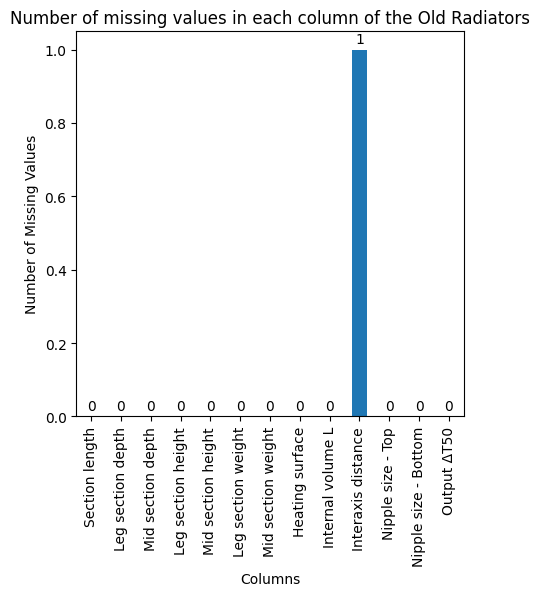

In [111]:
missingValues = test.isnull().sum()
plt.figure(figsize=(5, 5))
ax = missingValues.plot(kind='bar')

for i, value in enumerate(missingValues): #label of count on top
    ax.text(i, value + 0.01, str(value), ha='center', va='bottom')

plt.title('Number of missing values in each column of the Old Radiators')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()

### Rename the columns indentical to train's

In [112]:
# Rename columns
test.rename(columns={'Heating surface': 'Surface area', 'Internal volume L': 'Internal volume'}, inplace=True)

# Print to verify changes
print(test.columns)

Index(['Section length', 'Leg section depth', 'Mid section depth',
       'Leg section height', 'Mid section height', 'Leg section weight',
       'Mid section weight', 'Surface area', 'Internal volume',
       'Interaxis distance', 'Nipple size - Top', 'Nipple size - Bottom',
       'Output ΔT50'],
      dtype='object')


In [113]:
# Rename the column in test DataFrame
test.rename(columns={'Mid section depth': 'Mid section Depth'}, inplace=True)

print(" Column 'Mid section depth' renamed to 'Mid section Depth' in test data.")

 Column 'Mid section depth' renamed to 'Mid section Depth' in test data.


In [114]:
test['Interaxis distance']=test['Interaxis distance'].fillna(test['Interaxis distance'].median())

### Make every columns into float

In [115]:
# convert to float
test['Nipple size - Top'] = test['Nipple size - Top'].apply(lambda x: float(x.replace('"', '')) if x != 0 else x)
test['Nipple size - Bottom'] = test['Nipple size - Bottom'].apply(lambda x: float(x.replace('"', '')) if x != 0 else x)

### Make the Nipple size criteria identical with the training set

In [116]:
test['Nipple size']=test['Nipple size - Bottom']
test=test.drop(columns=['Nipple size - Top','Nipple size - Bottom'])

In [117]:
test.head()

Section length  Leg section depth  Mid section Depth  Leg section height  \
0              76                318                318                 330   
1              76                318                318                 356   
2              76                318                318                 406   
3              76                318                318                 457   
4              76                318                318                 508   

   Mid section height  Leg section weight  Mid section weight Surface area  \
0                 305                6.70                 6.0     0.340642   
1                 331                7.20                 6.5     0.371609   
2                 381                8.25                 7.4     0.433544   
3                 432                9.27                 8.3     0.495479   
4                 483               10.30                 9.3     0.557414   

  Internal volume  Interaxis distance  Output ΔT50  Nipple size  
0               2               210.0          114          2.0  
1            2.15               233.0          123          2.0  
2            2.46               286.0          140          2.0  
3            2.77               333.0          158          2.0  
4            3.07               384.0          175          2.0

### Missing data (Heating Surface and Internal volume)

In [118]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Target variables
target_surface = 'Surface area'
target_volume = 'Internal volume'

# Features for modeling
features = ['Section length', 'Leg section depth', 'Mid section Depth', 'Leg section height',
            'Mid section height', 'Leg section weight', 'Mid section weight']

# Replace 'Not available' with NaN
test.replace('Not available', np.nan, inplace=True)


# Train model for predicting 'Heating surface'
test_surface_known = test.dropna(subset=features + [target_surface])
X_surface_known = test_surface_known[features]
y_surface_known = test_surface_known[target_surface]

imputer_surface = SimpleImputer(strategy="mean")
X_surface_known_imputed = imputer_surface.fit_transform(X_surface_known)

model_surface = LinearRegression()
model_surface.fit(X_surface_known_imputed, y_surface_known)

# Train model for predicting 'Internal volume L'
test_volume_known = test.dropna(subset=features + [target_volume])
X_volume_known = test_volume_known[features]
y_volume_known = test_volume_known[target_volume]

imputer_volume = SimpleImputer(strategy="mean")
X_volume_known_imputed = imputer_volume.fit_transform(X_volume_known)

model_volume = LinearRegression()
model_volume.fit(X_volume_known_imputed, y_volume_known)

# Predict missing values for 'Heating surface'
test_surface_missing = test[test[target_surface].isna()]
if not test_surface_missing.empty:
    X_surface_missing = imputer_surface.transform(test_surface_missing[features])
    test.loc[test_surface_missing.index, target_surface] = model_surface.predict(X_surface_missing)

# Predict missing values for 'Internal volume L'
test_volume_missing = test[test[target_volume].isna()]
if not test_volume_missing.empty:
    X_volume_missing = imputer_volume.transform(test_volume_missing[features])
    test.loc[test_volume_missing.index, target_volume] = model_volume.predict(X_volume_missing)

# Output message after processing
print("Linear Regression models trained and missing values filled.")

Linear Regression models trained and missing values filled.


### Convert mm to dm to ensures consistency and prevents unit mismatches

In [119]:
test['Leg section depth'] = test['Leg section depth'] / 100
test['Mid section Depth'] = test['Mid section Depth'] / 100
test['Leg section height'] = test['Leg section height'] / 100
test['Mid section height'] = test['Mid section height'] / 100
test['Nipple size'] = test['Nipple size'] * 25.4 / 100

In [120]:
test.head()

Section length  Leg section depth  Mid section Depth  Leg section height  \
0              76               3.18               3.18                3.30   
1              76               3.18               3.18                3.56   
2              76               3.18               3.18                4.06   
3              76               3.18               3.18                4.57   
4              76               3.18               3.18                5.08   

   Mid section height  Leg section weight  Mid section weight  Surface area  \
0                3.05                6.70                 6.0      0.340642   
1                3.31                7.20                 6.5      0.371609   
2                3.81                8.25                 7.4      0.433544   
3                4.32                9.27                 8.3      0.495479   
4                4.83               10.30                 9.3      0.557414   

   Internal volume  Interaxis distance  Output ΔT50  Nipple size  
0             2.00               210.0          114        0.508  
1             2.15               233.0          123        0.508  
2             2.46               286.0          140        0.508  
3             2.77               333.0          158        0.508  
4             3.07               384.0          175        0.508

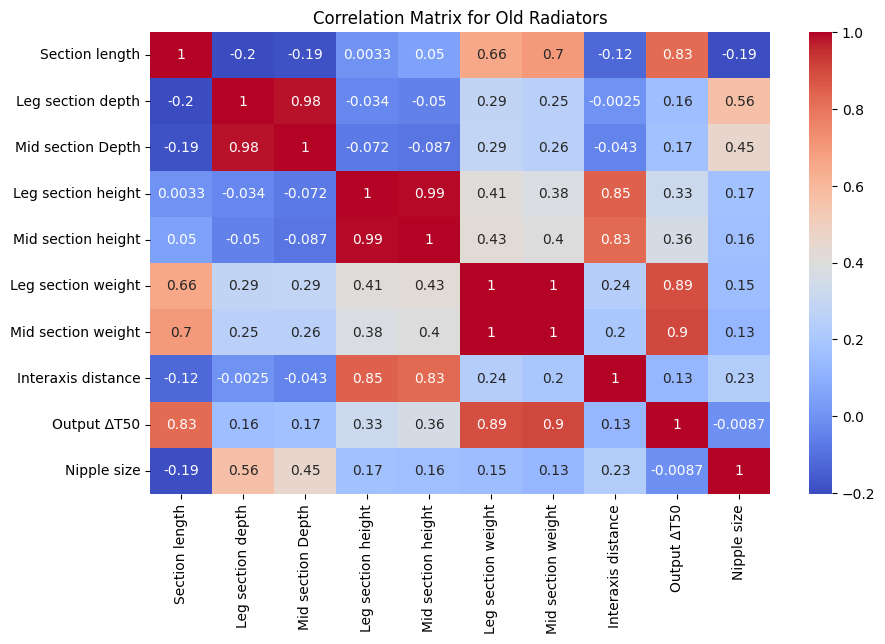

In [121]:
df2 = test.drop(['Internal volume', 'Surface area'], axis=1) #correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Old Radiators")
plt.show()

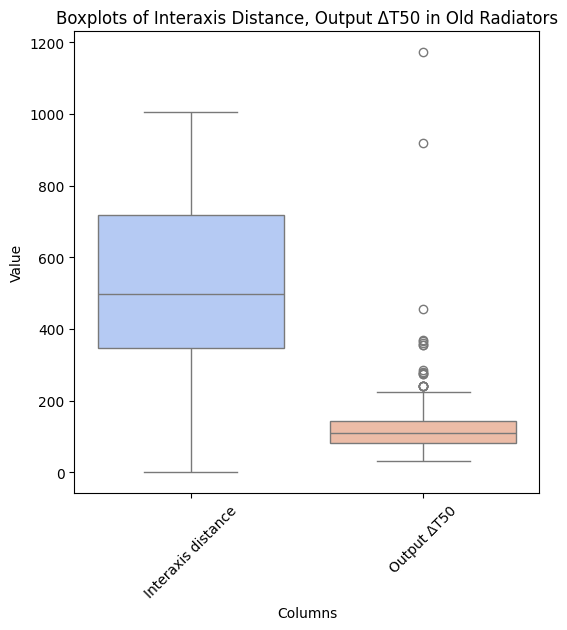

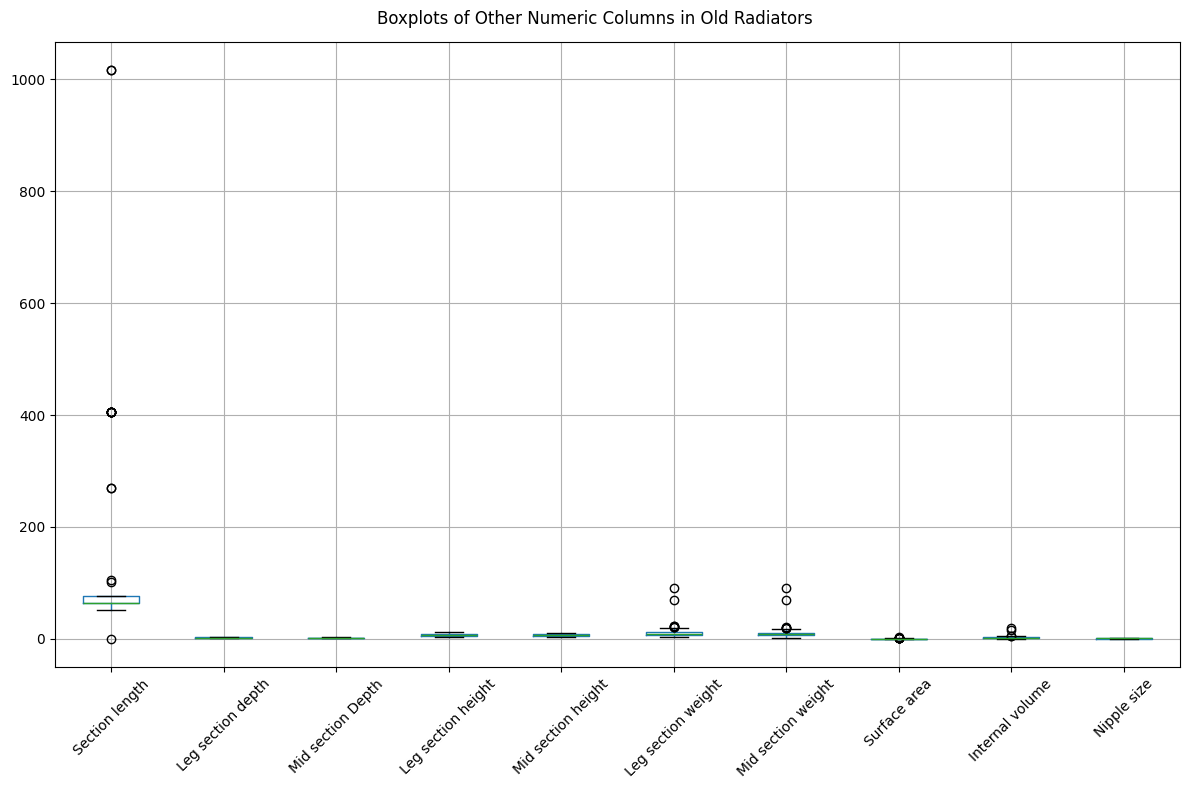

In [122]:
# Boxplot for 'Interaxis Distance' and 'Output ΔT50'
colList1 = ['Interaxis distance', 'Output ΔT50']
plt.figure(figsize=(6, 6))
sns.boxplot(data=test[colList1], palette='coolwarm')
plt.title('Boxplots of Interaxis Distance, Output ΔT50 in Old Radiators')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

# Boxplot for all other numeric columns excluding 'Interaxis Distance' and 'Output ΔT50'
plt.figure(figsize=(12, 8))
numericCols = test.select_dtypes(include=['number'])  # Select only numeric columns
toDrop = colList1
numericCols.drop(columns=toDrop).boxplot()
plt.suptitle("Boxplots of Other Numeric Columns in Old Radiators")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

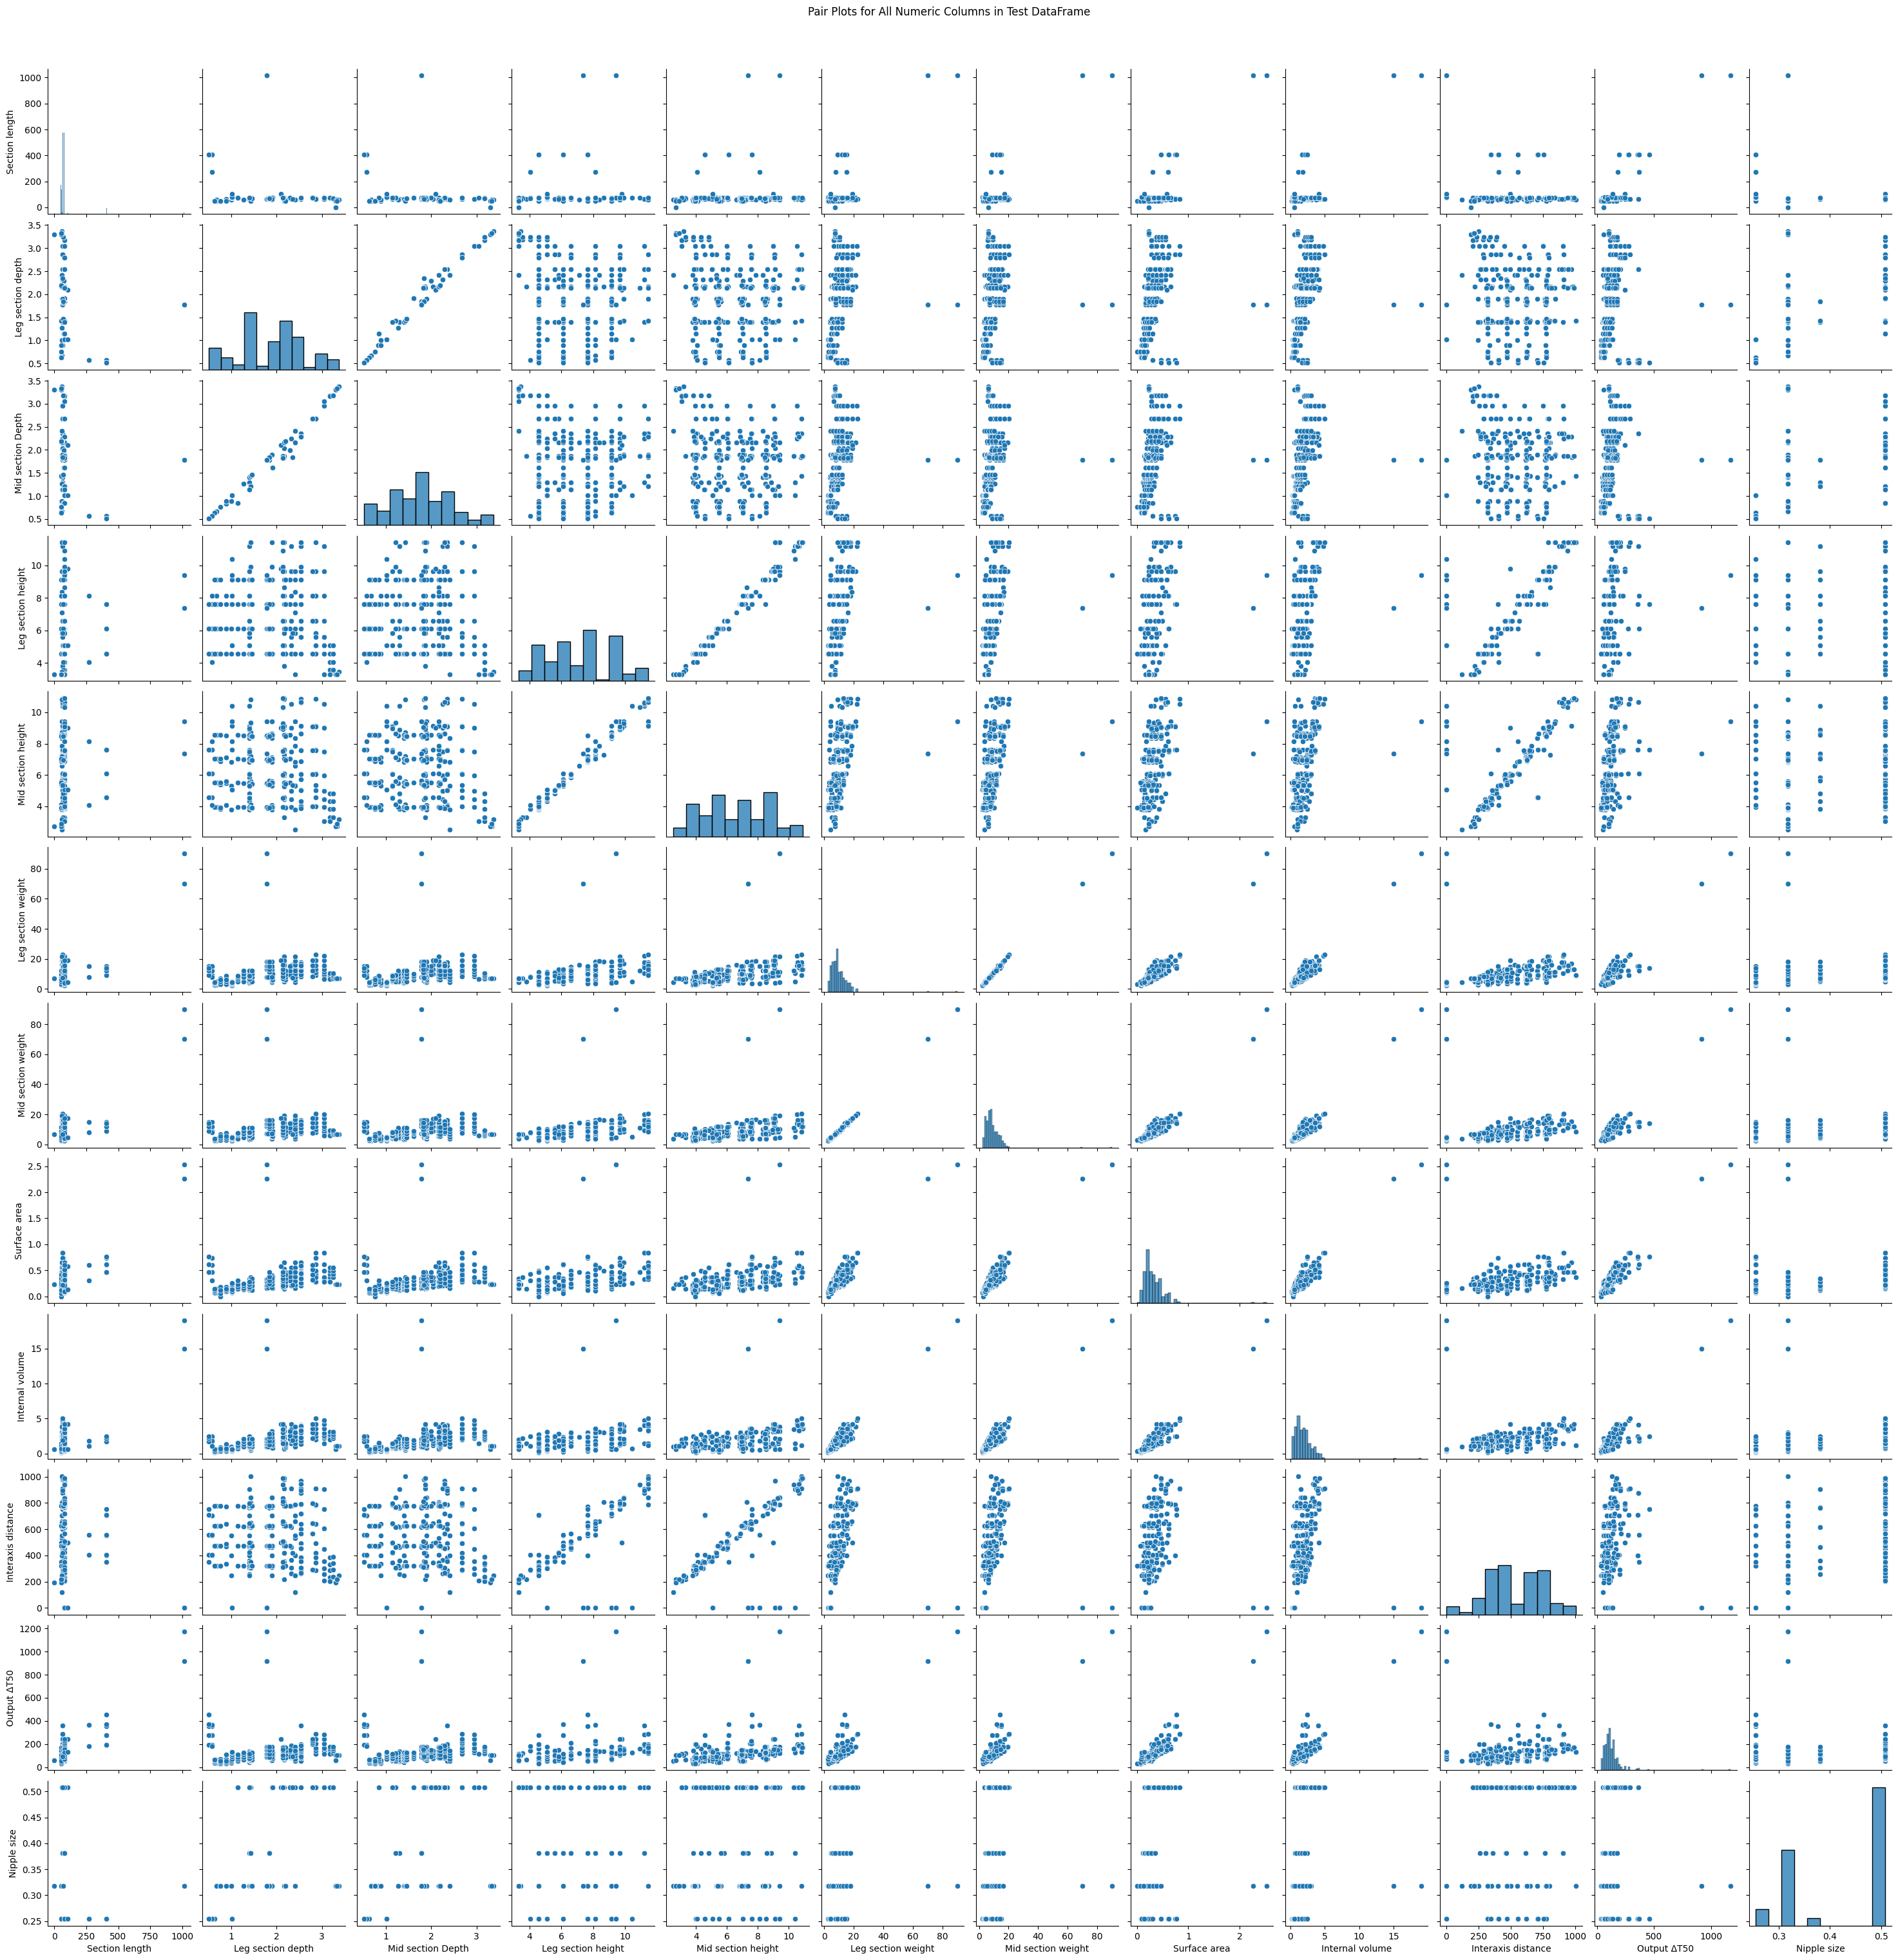

In [123]:
# pairplot
sns.pairplot(numericCols)
plt.suptitle('Pair Plots for All Numeric Columns in Test DataFrame', y=1.02)
plt.show()


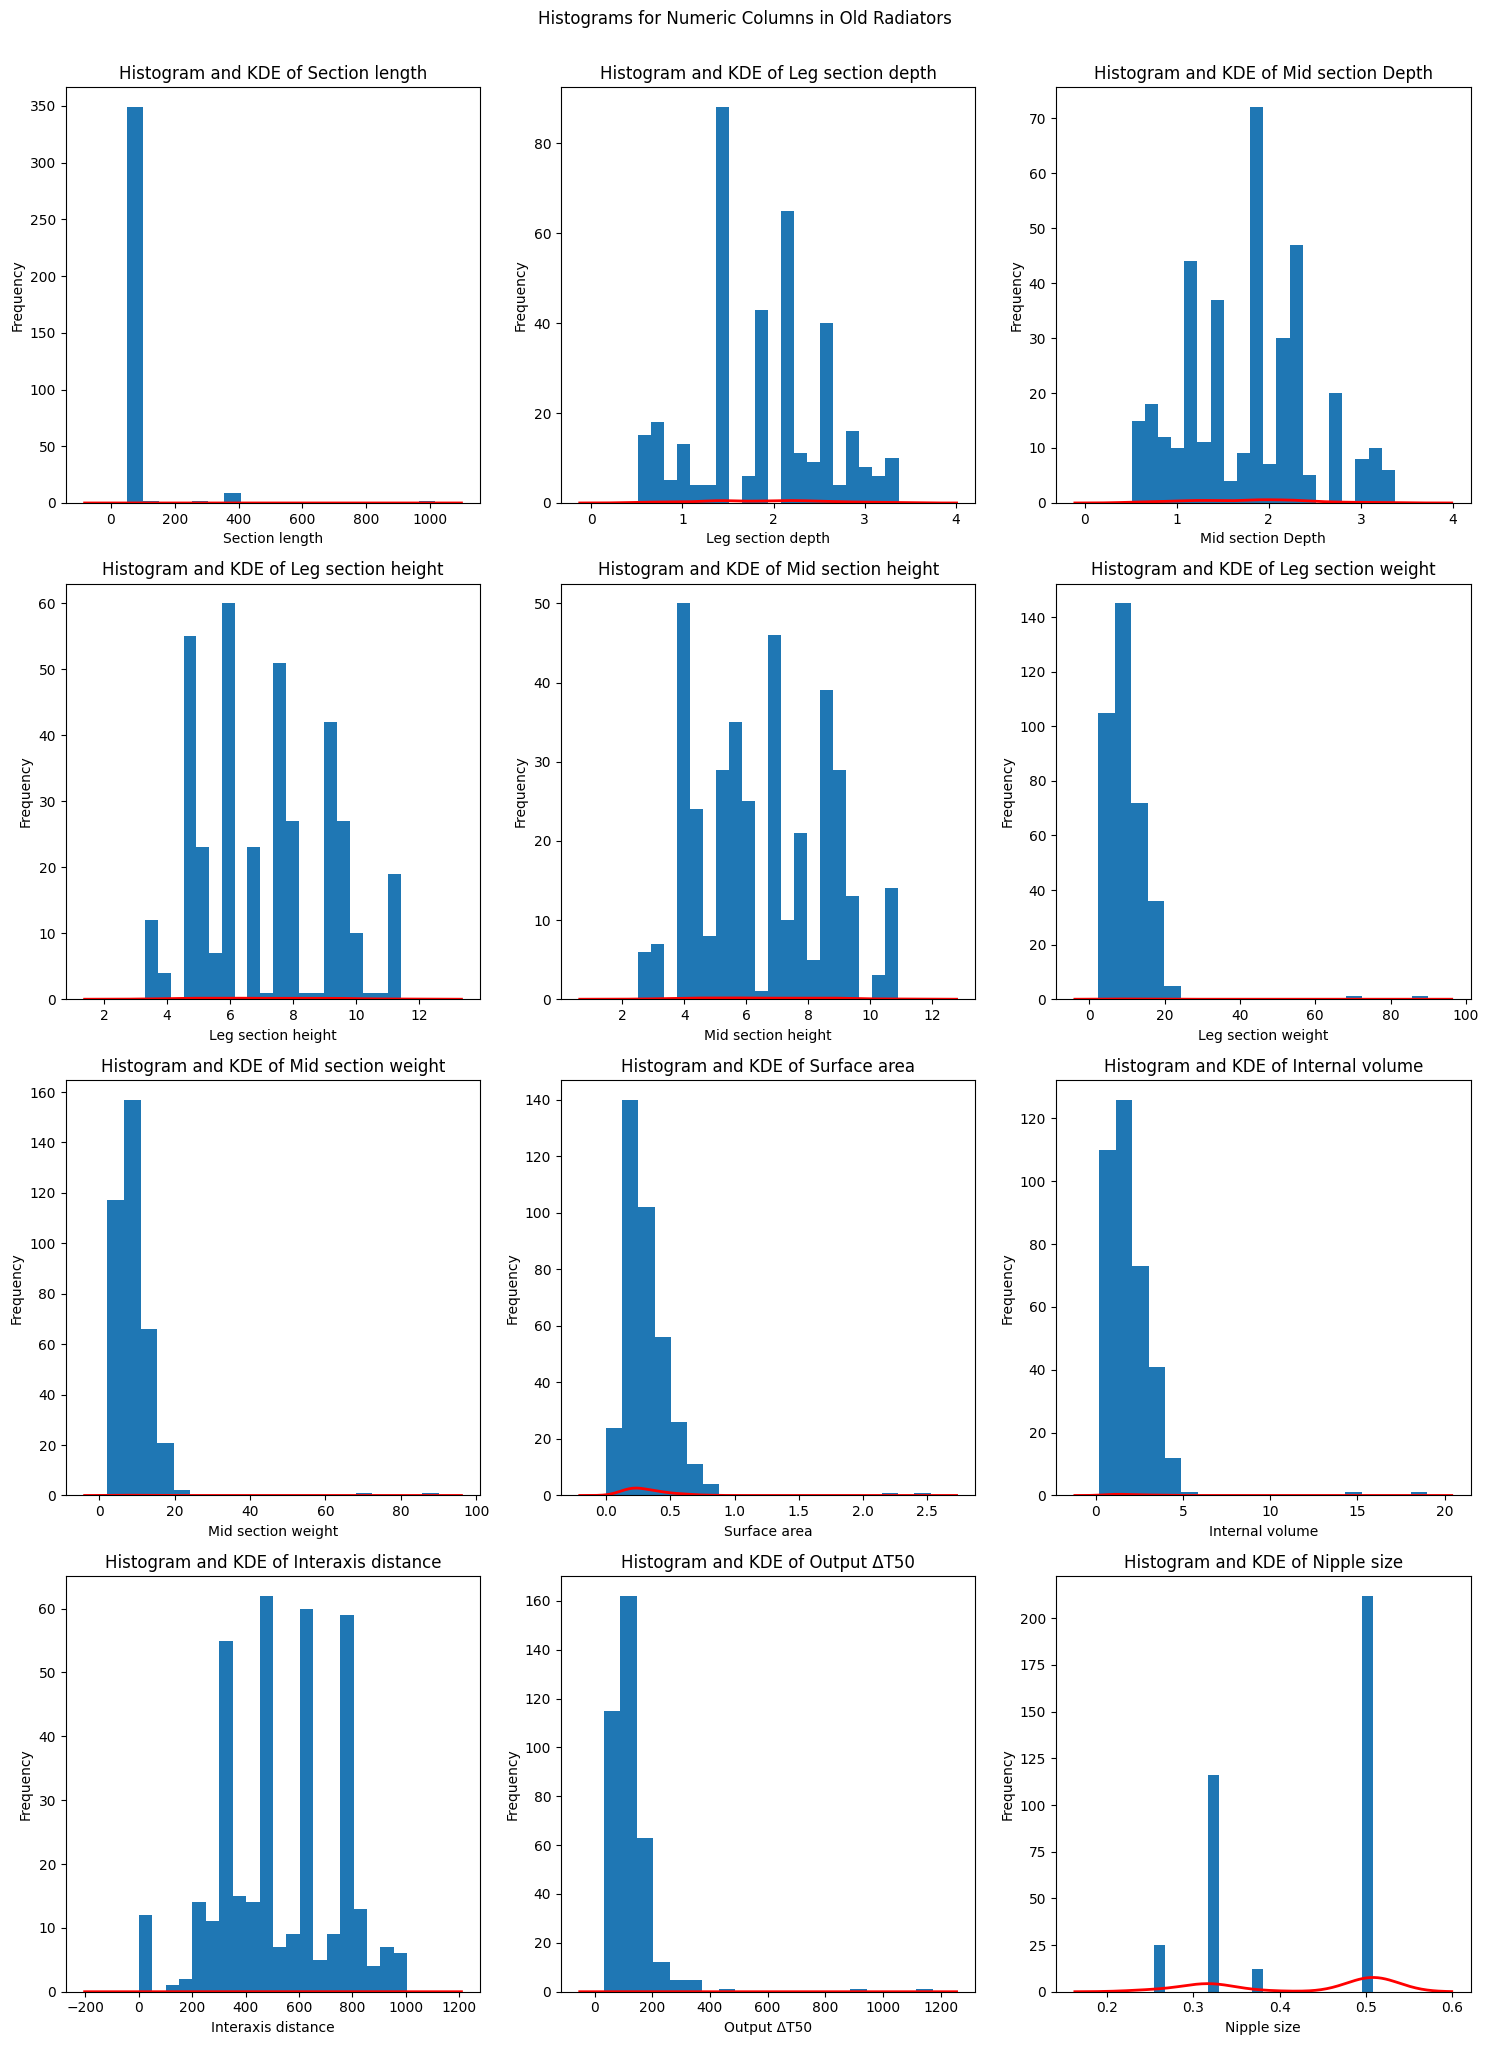

In [124]:
numPlots = len(numericCols.columns)
cols = 3
rows=np.ceil(numPlots / cols)   # calculating number of rows needed
rows = int(rows)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

#histogram for each numeric column
for i, col in enumerate(numericCols.columns):
    axes[i].hist(numericCols[col], bins=20)
    sns.kdeplot(numericCols[col], ax=axes[i], color='red', linewidth=2)
    axes[i].set_title(f'Histogram and KDE of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# hiding any unused subplots for better visualisation
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle('Histograms for Numeric Columns in Old Radiators', y=1.02)
plt.show()

Median Values for Each Column:
Section length         64.000000
Leg section depth       1.900000
Mid section Depth       1.870000
Leg section height      6.600000
Mid section height      6.100000
Leg section weight      8.700000
Mid section weight      7.900000
Surface area            0.278707
Internal volume         1.700000
Interaxis distance    497.000000
Output ΔT50           110.000000
Nipple size             0.508000
dtype: float64


Mode Values for Each Column:
Section length         76.000000
Leg section depth       1.430000
Mid section Depth       1.900000
Leg section height      4.570000
Mid section height      7.020000
Leg section weight     12.000000
Mid section weight      9.000000
Surface area            0.232256
Internal volume         1.500000
Interaxis distance    473.000000
Output ΔT50            58.000000
Nipple size             0.508000
Name: 0, dtype: float64


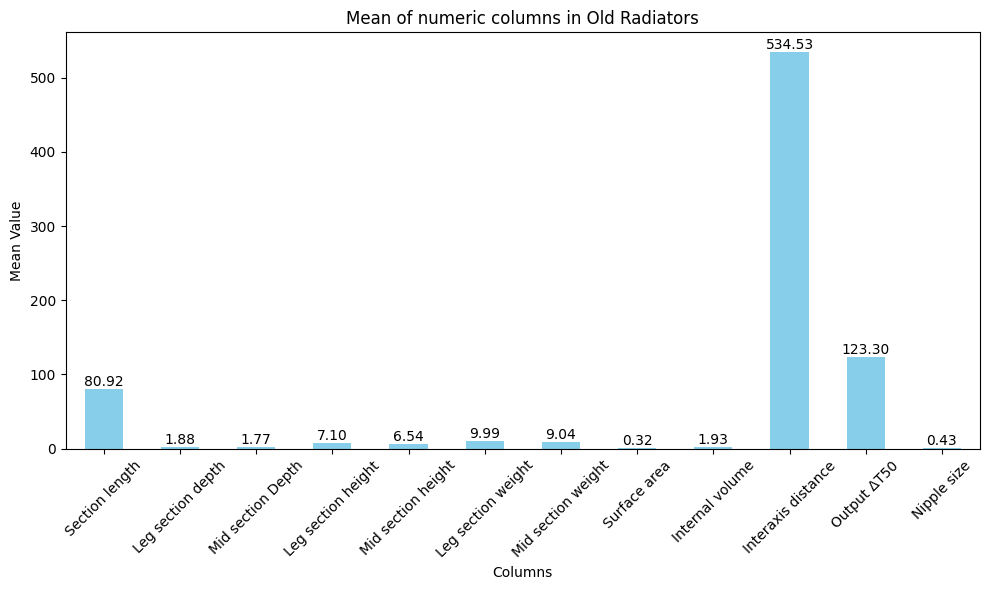

In [125]:
medianValues = numericCols.median()
modeValues = numericCols.mode().iloc[0]  # we take first mode if there are multiple
print("Median Values for Each Column:")
print(medianValues)
print('\n')
print("Mode Values for Each Column:")
print(modeValues)

meanValues = numericCols.mean()  #calculating means

plt.figure(figsize=(10, 6))
ax = meanValues.plot(kind='bar', color='skyblue')

for patch in ax.patches: #value labels on top of each bar
    height = patch.get_height()
    width=patch.get_width()
    ax.text(patch.get_x() + width/ 2, height + 0.05, f'{height:.2f}',
            ha='center', va='bottom')
plt.title('Mean of numeric columns in Old Radiators')
plt.xlabel('Columns')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modeling

In [126]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

In [127]:
# defining features and targets using the complete set of features
features = [
    'Section length', 'Leg section depth', 'Mid section Depth',
    'Leg section height', 'Mid section height',
    'Leg section weight', 'Mid section weight',
    'Internal volume', 'Interaxis distance',
    'Nipple size', 'Surface area',
]

X = train[features]
y_k = train['Factor Km']
y_n = train['Exponent n']

# train/test split (80/20)
X_train, X_test, y_k_train, y_k_test = train_test_split(X, y_k, test_size=0.2, random_state=42)
y_n_train, y_n_test = train_test_split(y_n, test_size=0.2, random_state=42)

In [128]:
# scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
# defining RidgeCV model
alphas = np.logspace(-3, 3, 13)
ridge_k = RidgeCV(alphas=alphas, cv=5)
ridge_n = RidgeCV(alphas=alphas, cv=5)

In [130]:
# 5-fold cross-validation on training set
cv = KFold(n_splits=5, shuffle=True, random_state=42)

ridge_scores_k = cross_val_score(ridge_k, X_train_scaled, y_k_train, cv=cv, scoring='neg_mean_squared_error')
ridge_scores_n = cross_val_score(ridge_n, X_train_scaled, y_n_train, cv=cv, scoring='neg_mean_squared_error')

ridge_cv_mse_k = -np.mean(ridge_scores_k)
ridge_cv_mse_n = -np.mean(ridge_scores_n)

print(f"[Ridge] Cross-Validation MSE (Factor Km): {ridge_cv_mse_k:.6f}")
print(f"[Ridge] Cross-Validation MSE (Exponent n): {ridge_cv_mse_n:.6f}")


[Ridge] Cross-Validation MSE (Factor Km): 0.008242
[Ridge] Cross-Validation MSE (Exponent n): 0.000775


In [131]:
# fitting Ridge model on training set
ridge_k.fit(X_train_scaled, y_k_train)
ridge_n.fit(X_train_scaled, y_n_train)

RidgeCV(alphas=array([1.00000000e-03, 3.16227766e-03, 1.00000000e-02, 3.16227766e-02,
       1.00000000e-01, 3.16227766e-01, 1.00000000e+00, 3.16227766e+00,
       1.00000000e+01, 3.16227766e+01, 1.00000000e+02, 3.16227766e+02,
       1.00000000e+03]),
        cv=5)

In [132]:
# predict on test set
y_k_pred_ridge = ridge_k.predict(X_test_scaled)
y_n_pred_ridge = ridge_n.predict(X_test_scaled)

In [133]:
# evaluating test set performance
ridge_mse_k = mean_squared_error(y_k_test, y_k_pred_ridge)
ridge_mse_n = mean_squared_error(y_n_test, y_n_pred_ridge)

ridge_r2_k = r2_score(y_k_test, y_k_pred_ridge)
ridge_r2_n = r2_score(y_n_test, y_n_pred_ridge)

print(f"[Ridge] Test MSE (Factor Km): {ridge_mse_k:.6f}")
print(f"[Ridge] Test MSE (Exponent n): {ridge_mse_n:.6f}")
print(f"[Ridge] R² Score (Factor Km): {ridge_r2_k:.4f}")
print(f"[Ridge] R² Score (Exponent n): {ridge_r2_n:.4f}")

[Ridge] Test MSE (Factor Km): 0.003807
[Ridge] Test MSE (Exponent n): 0.000835
[Ridge] R² Score (Factor Km): 0.8668
[Ridge] R² Score (Exponent n): 0.2079


In [134]:
from sklearn.ensemble import RandomForestRegressor

In [135]:
# defining models
rf_k = RandomForestRegressor(n_estimators=100, random_state=42)
rf_n = RandomForestRegressor(n_estimators=100, random_state=42)

In [136]:
# 5-fold cross-validation
rf_scores_k = cross_val_score(rf_k, X_train, y_k_train, cv=cv, scoring='neg_mean_squared_error')
rf_scores_n = cross_val_score(rf_n, X_train, y_n_train, cv=cv, scoring='neg_mean_squared_error')

rf_cv_mse_k = -np.mean(rf_scores_k)
rf_cv_mse_n = -np.mean(rf_scores_n)

print(f"[Random Forest] Cross-Validation MSE (Factor Km): {rf_cv_mse_k:.6f}")
print(f"[Random Forest] Cross-Validation MSE (Exponent n): {rf_cv_mse_n:.6f}")


[Random Forest] Cross-Validation MSE (Factor Km): 0.012158
[Random Forest] Cross-Validation MSE (Exponent n): 0.000887


In [137]:
# fitting models on training set
rf_k.fit(X_train, y_k_train)
rf_n.fit(X_train, y_n_train)

RandomForestRegressor(random_state=42)

In [138]:
# predicting on test set
y_k_pred_rf = rf_k.predict(X_test)
y_n_pred_rf = rf_n.predict(X_test)

# evaluating on test set
rf_mse_k = mean_squared_error(y_k_test, y_k_pred_rf)
rf_mse_n = mean_squared_error(y_n_test, y_n_pred_rf)

rf_r2_k = r2_score(y_k_test, y_k_pred_rf)
rf_r2_n = r2_score(y_n_test, y_n_pred_rf)

print(f"[Random Forest] Test MSE (Factor Km): {rf_mse_k:.6f}")
print(f"[Random Forest] Test MSE (Exponent n): {rf_mse_n:.6f}")
print(f"[Random Forest] R² Score (Factor Km): {rf_r2_k:.4f}")
print(f"[Random Forest] R² Score (Exponent n): {rf_r2_n:.4f}")

[Random Forest] Test MSE (Factor Km): 0.003676
[Random Forest] Test MSE (Exponent n): 0.000580
[Random Forest] R² Score (Factor Km): 0.8714
[Random Forest] R² Score (Exponent n): 0.4497


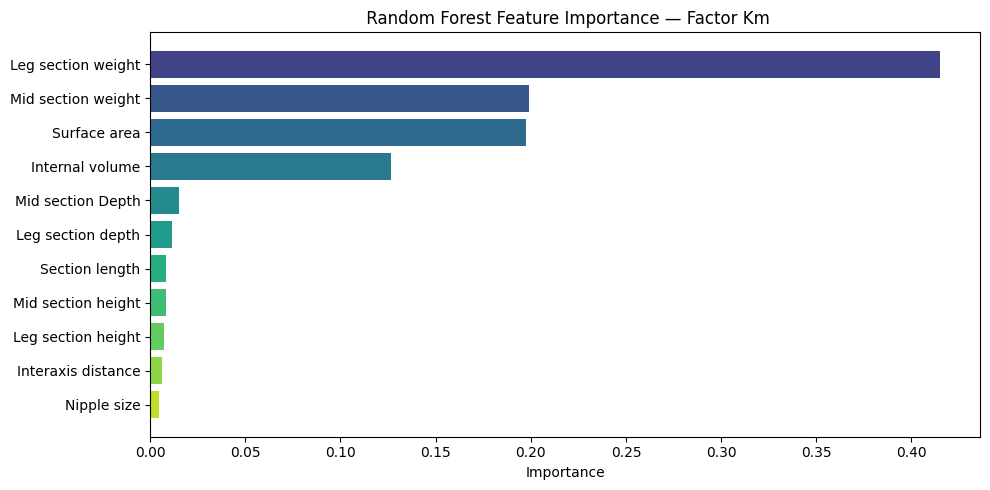

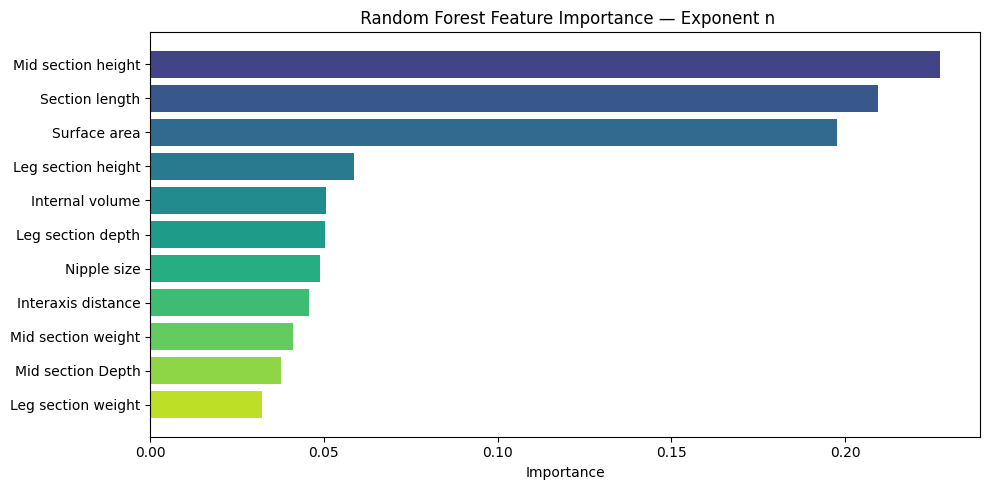

In [139]:
import matplotlib.pyplot as plt

# feature importance
feature_names = X_train.columns

def plot_feature_importance_colored(importances, title):
    indices = np.argsort(importances)[::-1]
    sorted_names = feature_names[indices]
    sorted_importances = importances[indices]

    colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(sorted_importances)))

    plt.figure(figsize=(10, 5))
    plt.barh(sorted_names, sorted_importances, color=colors)
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# plot for Factor Km and Exponent n
plot_feature_importance_colored(rf_k.feature_importances_, ' Random Forest Feature Importance — Factor Km')
plot_feature_importance_colored(rf_n.feature_importances_, ' Random Forest Feature Importance — Exponent n')

In [140]:
from sklearn.ensemble import GradientBoostingRegressor

In [141]:
# defining models
gb_k = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_n = GradientBoostingRegressor(n_estimators=100, random_state=42)

# cross-validation (5-fold)
gb_scores_k = cross_val_score(gb_k, X_train, y_k_train, cv=cv, scoring='neg_mean_squared_error')
gb_scores_n = cross_val_score(gb_n, X_train, y_n_train, cv=cv, scoring='neg_mean_squared_error')

gb_cv_mse_k = -np.mean(gb_scores_k)
gb_cv_mse_n = -np.mean(gb_scores_n)

print(f"[Gradient Boosting] Cross-Validation MSE (Factor Km): {gb_cv_mse_k:.6f}")
print(f"[Gradient Boosting] Cross-Validation MSE (Exponent n): {gb_cv_mse_n:.6f}")

[Gradient Boosting] Cross-Validation MSE (Factor Km): 0.010343
[Gradient Boosting] Cross-Validation MSE (Exponent n): 0.000979


In [142]:
# fitting models
gb_k.fit(X_train, y_k_train)
gb_n.fit(X_train, y_n_train)


GradientBoostingRegressor(random_state=42)

In [143]:
# predicting on test set
y_k_pred_gb = gb_k.predict(X_test)
y_n_pred_gb = gb_n.predict(X_test)

# evaluating the test performance
gb_mse_k = mean_squared_error(y_k_test, y_k_pred_gb)
gb_mse_n = mean_squared_error(y_n_test, y_n_pred_gb)

gb_r2_k = r2_score(y_k_test, y_k_pred_gb)
gb_r2_n = r2_score(y_n_test, y_n_pred_gb)

print(f"[Gradient Boosting] Test MSE (Factor Km): {gb_mse_k:.6f}")
print(f"[Gradient Boosting] Test MSE (Exponent n): {gb_mse_n:.6f}")
print(f"[Gradient Boosting] R² Score (Factor Km): {gb_r2_k:.4f}")
print(f"[Gradient Boosting] R² Score (Exponent n): {gb_r2_n:.4f}")

[Gradient Boosting] Test MSE (Factor Km): 0.004712
[Gradient Boosting] Test MSE (Exponent n): 0.000726
[Gradient Boosting] R² Score (Factor Km): 0.8351
[Gradient Boosting] R² Score (Exponent n): 0.3111


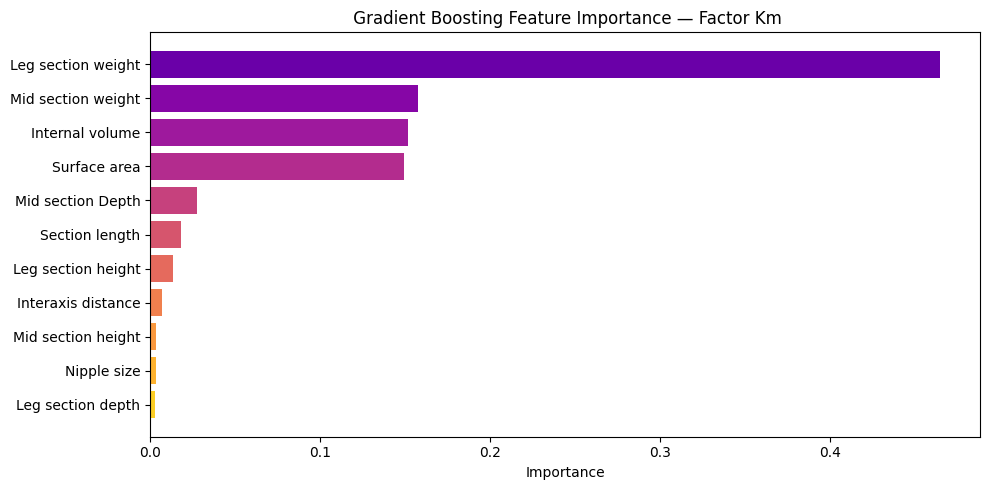

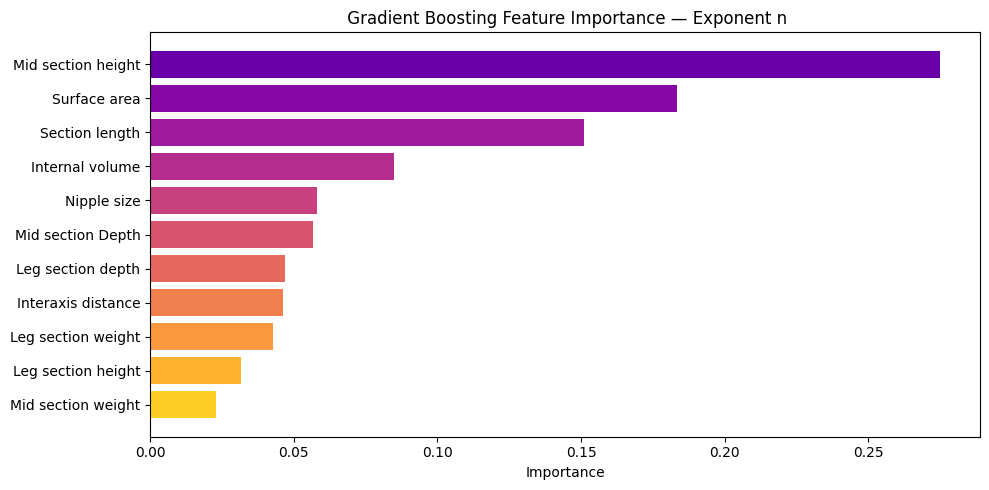

In [144]:
# feature importance gbr
feature_names = X_train.columns

def plot_feature_importance_colored(importances, title):
    indices = np.argsort(importances)[::-1]
    sorted_names = feature_names[indices]
    sorted_importances = importances[indices]
    colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(sorted_importances)))

    plt.figure(figsize=(10, 5))
    plt.barh(sorted_names, sorted_importances, color=colors)
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot importances
plot_feature_importance_colored(gb_k.feature_importances_, ' Gradient Boosting Feature Importance — Factor Km')
plot_feature_importance_colored(gb_n.feature_importances_, ' Gradient Boosting Feature Importance — Exponent n')

In [145]:
pip install xgboost

In [146]:
from xgboost import XGBRegressor

In [147]:
# defining models for k and n
xgb_k = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_n = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# cross-validation (5-fold)
xgb_scores_k = cross_val_score(xgb_k, X_train, y_k_train, cv=cv, scoring='neg_mean_squared_error')
xgb_scores_n = cross_val_score(xgb_n, X_train, y_n_train, cv=cv, scoring='neg_mean_squared_error')

xgb_cv_mse_k = -np.mean(xgb_scores_k)
xgb_cv_mse_n = -np.mean(xgb_scores_n)

print(f"[XGBoost] Cross-Validation MSE (Factor Km): {xgb_cv_mse_k:.6f}")
print(f"[XGBoost] Cross-Validation MSE (Exponent n): {xgb_cv_mse_n:.6f}")

[XGBoost] Cross-Validation MSE (Factor Km): 0.011162
[XGBoost] Cross-Validation MSE (Exponent n): 0.000744


In [148]:
# fitting models
xgb_k.fit(X_train, y_k_train)
xgb_n.fit(X_train, y_n_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [149]:
# predicting on test set
y_k_pred_xgb = xgb_k.predict(X_test)
y_n_pred_xgb = xgb_n.predict(X_test)

# evaluating on test set
xgb_mse_k = mean_squared_error(y_k_test, y_k_pred_xgb)
xgb_mse_n = mean_squared_error(y_n_test, y_n_pred_xgb)

xgb_r2_k = r2_score(y_k_test, y_k_pred_xgb)
xgb_r2_n = r2_score(y_n_test, y_n_pred_xgb)

print(f"[XGBoost] Test MSE (Factor Km): {xgb_mse_k:.6f}")
print(f"[XGBoost] Test MSE (Exponent n): {xgb_mse_n:.6f}")
print(f"[XGBoost] R² Score (Factor Km): {xgb_r2_k:.4f}")
print(f"[XGBoost] R² Score (Exponent n): {xgb_r2_n:.4f}")


[XGBoost] Test MSE (Factor Km): 0.004198
[XGBoost] Test MSE (Exponent n): 0.000655
[XGBoost] R² Score (Factor Km): 0.8531
[XGBoost] R² Score (Exponent n): 0.3783


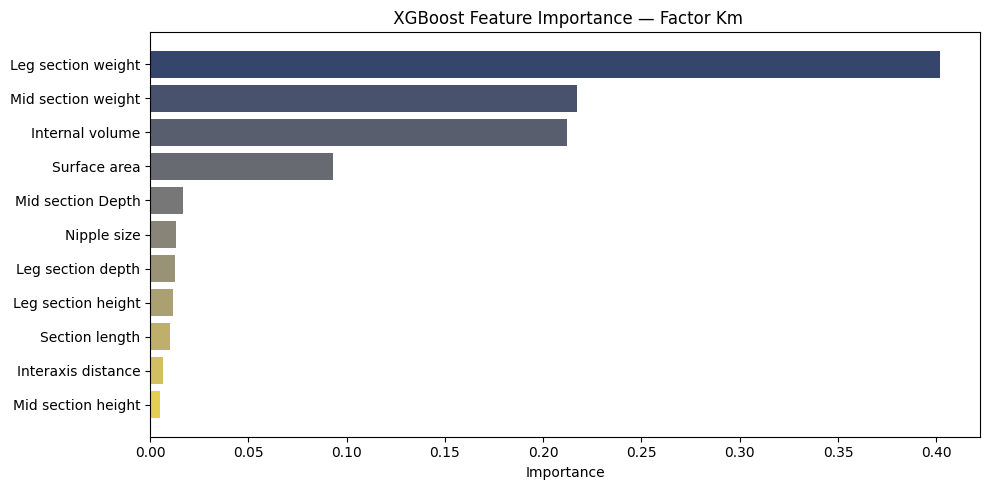

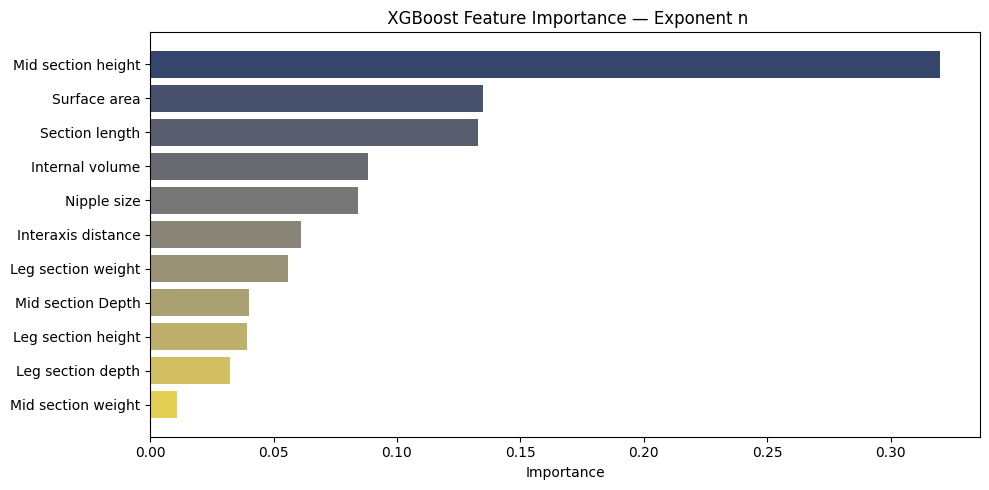

In [150]:
# feature importance plot
feature_names = X_train.columns

def plot_feature_importance_colored(importances, title):
    indices = np.argsort(importances)[::-1]
    sorted_names = feature_names[indices]
    sorted_importances = importances[indices]
    colors = plt.cm.cividis(np.linspace(0.2, 0.9, len(sorted_importances)))

    plt.figure(figsize=(10, 5))
    plt.barh(sorted_names, sorted_importances, color=colors)
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_feature_importance_colored(xgb_k.feature_importances_, ' XGBoost Feature Importance — Factor Km')
plot_feature_importance_colored(xgb_n.feature_importances_, ' XGBoost Feature Importance — Exponent n')

In [151]:
model_names = ['Ridge', 'Random Forest', 'Gradient Boosting', 'XGBoost']

mse_k_values = [ridge_mse_k, rf_mse_k, gb_mse_k, xgb_mse_k]
mse_n_values = [ridge_mse_n, rf_mse_n, gb_mse_n, xgb_mse_n]

r2_k_values = [ridge_r2_k, rf_r2_k, gb_r2_k, xgb_r2_k]
r2_n_values = [ridge_r2_n, rf_r2_n, gb_r2_n, xgb_r2_n]


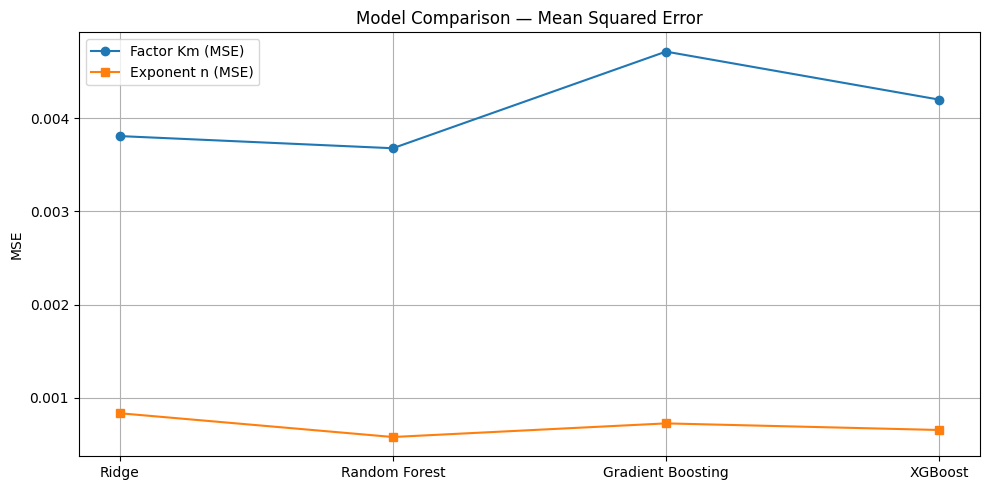

In [152]:
# line plot for MSE
plt.figure(figsize=(10, 5))
plt.plot(model_names, mse_k_values, marker='o', label='Factor Km (MSE)')
plt.plot(model_names, mse_n_values, marker='s', label='Exponent n (MSE)')
plt.title('Model Comparison — Mean Squared Error')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



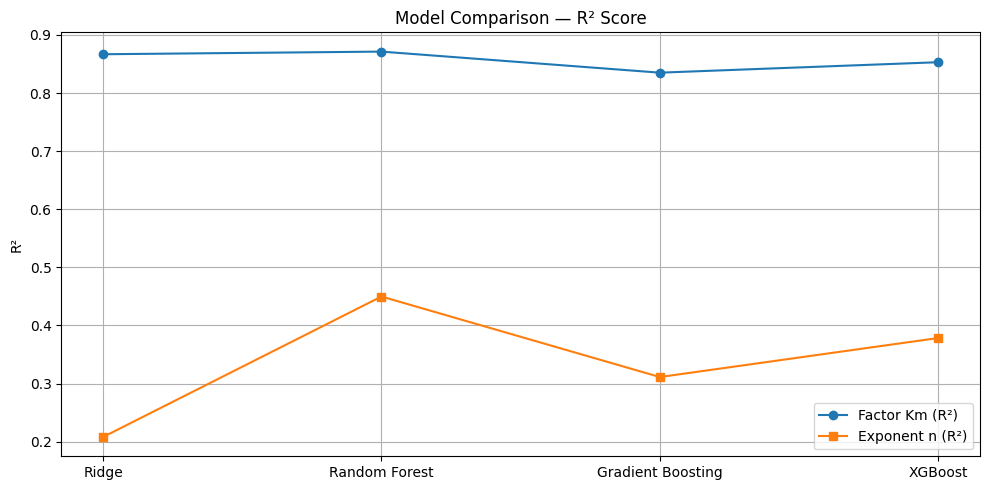

In [153]:
# line plot for R²
plt.figure(figsize=(10, 5))
plt.plot(model_names, r2_k_values, marker='o', label='Factor Km (R²)')
plt.plot(model_names, r2_n_values, marker='s', label='Exponent n (R²)')
plt.title('Model Comparison — R² Score')
plt.ylabel('R²')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [154]:
import pandas as pd

# combining into a dataframe
comparison_df = pd.DataFrame({
    'Model': model_names,
    'MSE (Factor Km)': mse_k_values,
    'MSE (Exponent n)': mse_n_values,
    'R² (Factor Km)': r2_k_values,
    'R² (Exponent n)': r2_n_values
})
comparison_df = comparison_df.round(5)

# display the table
print(comparison_df)


               Model  MSE (Factor Km)  MSE (Exponent n)  R² (Factor Km)  \
0              Ridge          0.00381           0.00083         0.86679   
1      Random Forest          0.00368           0.00058         0.87136   
2  Gradient Boosting          0.00471           0.00073         0.83509   
3            XGBoost          0.00420           0.00066         0.85311   

   R² (Exponent n)  
0          0.20790  
1          0.44975  
2          0.31113  
3          0.37832  


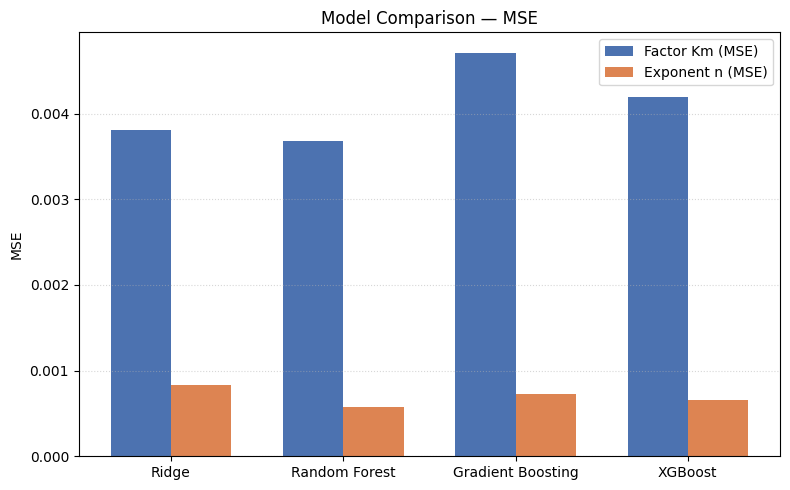

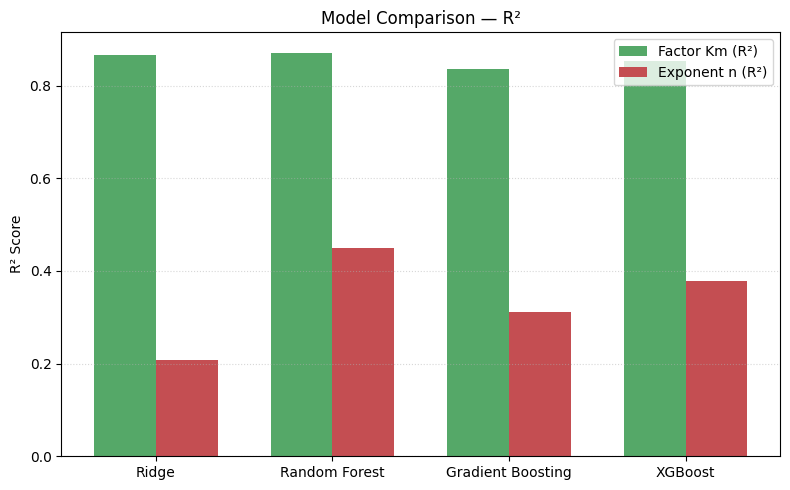

In [155]:
bar_width = 0.35
x = np.arange(len(model_names))

# plotting MSE for Factor Km vs Exponent n
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, mse_k_values, width=bar_width, label='Factor Km (MSE)', color='#4c72b0')
plt.bar(x + bar_width/2, mse_n_values, width=bar_width, label='Exponent n (MSE)', color='#dd8452')

plt.xticks(x, model_names)
plt.ylabel("MSE")
plt.title("Model Comparison — MSE")
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

# plotting R² for Factor Km vs Exponent n
plt.figure(figsize=(8, 5))
plt.bar(x - bar_width/2, r2_k_values, width=bar_width, label='Factor Km (R²)', color='#55a868')
plt.bar(x + bar_width/2, r2_n_values, width=bar_width, label='Exponent n (R²)', color='#c44e52')

plt.xticks(x, model_names)
plt.ylabel("R² Score")
plt.title("Model Comparison — R²")
plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()


In [156]:
print(f"Train set size: {len(X_train)} rows")
print(f"Test set size: {len(X_test)} rows")

Train set size: 64 rows
Test set size: 17 rows


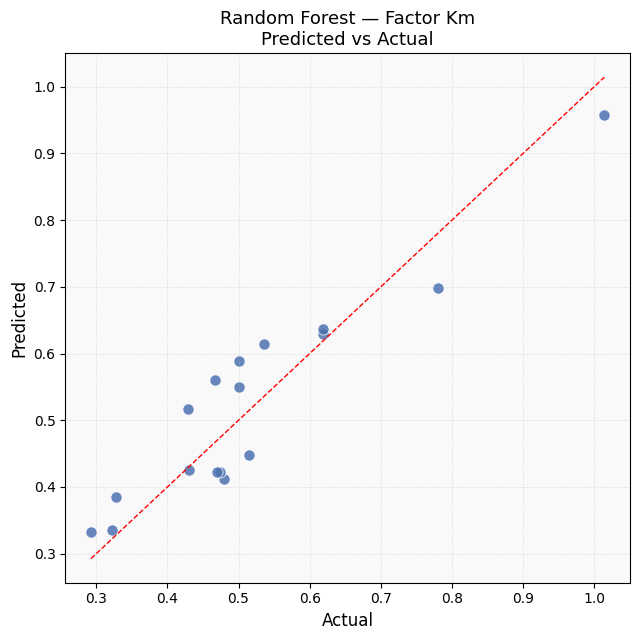

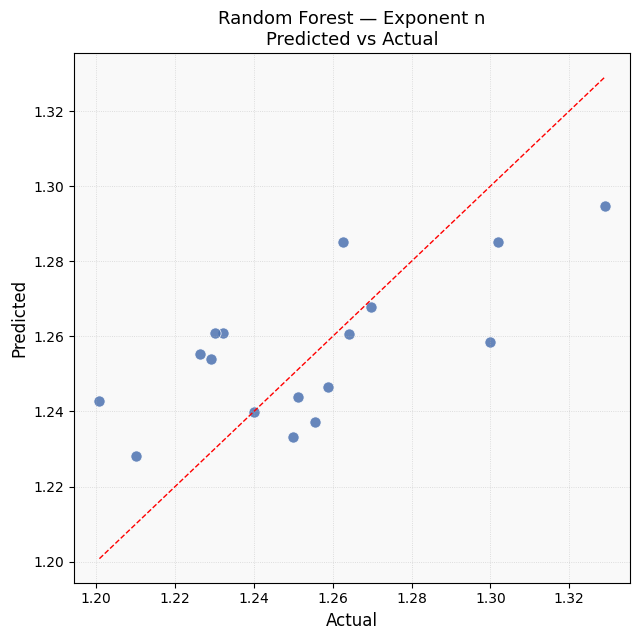

In [157]:
def plot_predicted_vs_actual(y_true, y_pred, label):
    plt.figure(figsize=(6.5, 6.5))


    plt.scatter(
        y_true, y_pred,
        color="#4c72b0",
        edgecolor='white',
        linewidth=0.6,
        alpha=0.85,
        s=65
    )


    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', color='red', linewidth=1)
    plt.xlabel("Actual", fontsize=12)
    plt.ylabel("Predicted", fontsize=12)
    plt.title(f"{label}\nPredicted vs Actual", fontsize=13)
    plt.grid(True, linestyle=':', linewidth=0.6, alpha=0.5)
    plt.gca().set_facecolor("#f9f9f9")
    plt.tight_layout()
    plt.show()

# Plot for Factor Km
plot_predicted_vs_actual(y_k_test, y_k_pred_rf, "Random Forest — Factor Km")

# Plot for Exponent n
plot_predicted_vs_actual(y_n_test, y_n_pred_rf, "Random Forest — Exponent n")



Ridge — Factor Km:
  5-Fold CV MSE:  0.008234
  Test MSE:       0.004177
  Test R²:        0.8538

Ridge — Exponent n:
  5-Fold CV MSE:  0.000691
  Test MSE:       0.000816
  Test R²:        0.2260

Random Forest — Factor Km:
  5-Fold CV MSE:  0.012280
  Test MSE:       0.003827
  Test R²:        0.8661

Random Forest — Exponent n:
  5-Fold CV MSE:  0.000850
  Test MSE:       0.000643
  Test R²:        0.3898

Gradient Boosting — Factor Km:
  5-Fold CV MSE:  0.014394
  Test MSE:       0.007389
  Test R²:        0.7414

Gradient Boosting — Exponent n:
  5-Fold CV MSE:  0.000979
  Test MSE:       0.000767
  Test R²:        0.2717

XGBoost — Factor Km:
  5-Fold CV MSE:  0.013979
  Test MSE:       0.003874
  Test R²:        0.8644

XGBoost — Exponent n:
  5-Fold CV MSE:  0.000861
  Test MSE:       0.000932
  Test R²:        0.1152


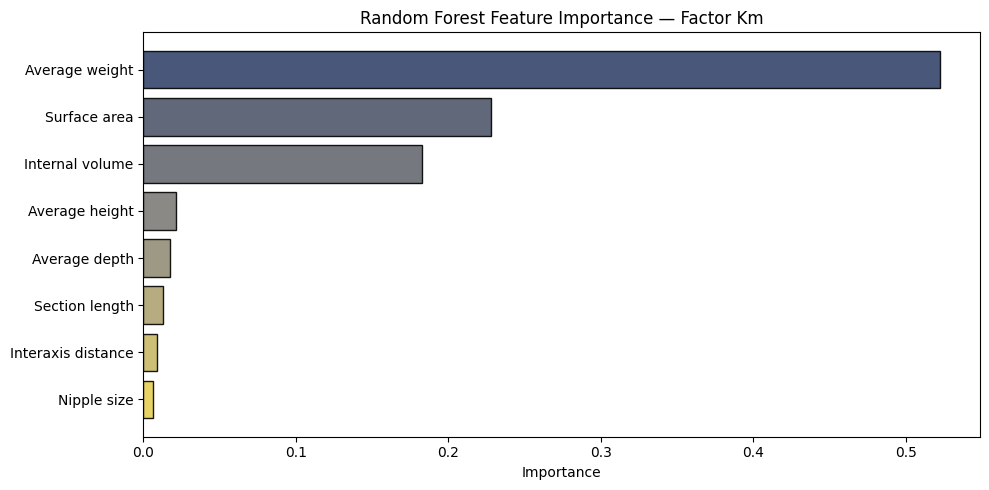

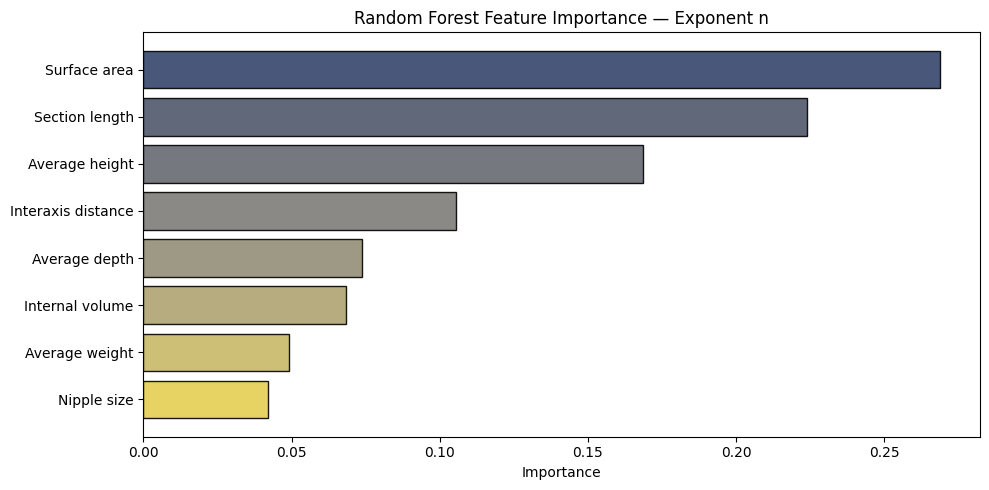

In [158]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

train_combined = train.copy()

train_combined['Average depth'] = (train_combined['Leg section depth'] + train_combined['Mid section Depth']) / 2
train_combined['Average height'] = (train_combined['Leg section height'] + train_combined['Mid section height']) / 2
train_combined['Average weight'] = (train_combined['Leg section weight'] + train_combined['Mid section weight']) / 2

columns_to_drop = [
    'Leg section depth', 'Mid section Depth',
    'Leg section height', 'Mid section height',
    'Leg section weight', 'Mid section weight'
]
train_combined = train_combined.drop(columns=columns_to_drop)

features_combined = [
    'Section length', 'Internal volume', 'Interaxis distance',
    'Nipple size', 'Surface area',
    'Average depth', 'Average height', 'Average weight'
]

X = train_combined[features_combined]
y_k = train_combined['Factor Km']
y_n = train_combined['Exponent n']

X_train, X_test, y_k_train, y_k_test = train_test_split(X, y_k, test_size=0.2, random_state=42)
_, _, y_n_train, y_n_test = train_test_split(X, y_n, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Ridge': Ridge(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=42)
}

def print_cv_and_test_metrics(model, X_train, y_train, X_test, y_test, label, model_name):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_mse_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_mse_mean = -np.mean(cv_mse_scores)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} — {label}:")
    print(f"  5-Fold CV MSE:  {cv_mse_mean:.6f}")
    print(f"  Test MSE:       {test_mse:.6f}")
    print(f"  Test R²:        {test_r2:.4f}")

for model_name, model in models.items():
    if model_name == 'Ridge':
        # Use scaled data
        print_cv_and_test_metrics(model, X_train_scaled, y_k_train, X_test_scaled, y_k_test, 'Factor Km', model_name)
        print_cv_and_test_metrics(model, X_train_scaled, y_n_train, X_test_scaled, y_n_test, 'Exponent n', model_name)
    else:
        # Use unscaled data
        print_cv_and_test_metrics(model, X_train, y_k_train, X_test, y_k_test, 'Factor Km', model_name)
        print_cv_and_test_metrics(model, X_train, y_n_train, X_test, y_n_test, 'Exponent n', model_name)

# Define feature importance plot function
def plot_feature_importance_colored(importances, feature_names, title):
    indices = np.argsort(importances)[::-1]
    sorted_names = feature_names[indices]
    sorted_importances = importances[indices]
    colors = plt.cm.cividis(np.linspace(0.2, 0.9, len(sorted_importances)))

    plt.figure(figsize=(10, 5))
    plt.barh(sorted_names, sorted_importances, color=colors, edgecolor='black', alpha=0.9)
    plt.xlabel('Importance')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

rf_model_k = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model_k.fit(X_train, y_k_train)
plot_feature_importance_colored(rf_model_k.feature_importances_, X_train.columns, 'Random Forest Feature Importance — Factor Km')

rf_model_n = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model_n.fit(X_train, y_n_train)
plot_feature_importance_colored(rf_model_n.feature_importances_, X_train.columns, 'Random Forest Feature Importance — Exponent n')

## Hyperparameter Tuning

In [159]:
import numpy as np
import pandas as pd
from scipy.stats import randint, loguniform, uniform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings, pprint

warnings.filterwarnings("ignore", category=UserWarning)

In [160]:
# Reproducibility
np.random.seed(42)

In [161]:
# Cross‑validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    "rmse": "neg_root_mean_squared_error",
    "r2": "r2"
}

In [163]:
# Pipeline
ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Ridge(random_state=42))
])

param_dist_ridge = {
    "model__alpha":        loguniform(1, 100000),
    "model__fit_intercept": [True, False],
    "model__solver":      ["auto", "svd", "cholesky", "lsqr", "sag", "saga"],
}

# Factor Km
ridge_k = RandomizedSearchCV(
    estimator          = ridge_pipe,
    param_distributions= param_dist_ridge,
    n_iter             = 400,
    cv                 = cv,
    scoring            = scoring,
    refit              = "rmse",
    n_jobs             = -1,
    random_state       = 42,
    verbose            = 1
)
ridge_k.fit(X_train, y_k_train)

# Exponent n
ridge_n = RandomizedSearchCV(
    estimator          = ridge_pipe,
    param_distributions= param_dist_ridge,
    n_iter             = 400,
    cv                 = cv,
    scoring            = scoring,
    refit              = "rmse",
    n_jobs             = -1,
    random_state       = 42,
    verbose            = 1
)
ridge_n.fit(X_train, y_n_train)

# evaluate on hold-out set
def evaluate(label, model, X, y):
    pred  = model.predict(X)
    # rmse  = mean_squared_error(y, pred, squared=False)
    rmse = np.sqrt(mean_squared_error(y, pred))
    r2    = r2_score(y, pred)
    print(f"{label:<10} |  Test RMSE: {rmse:.5f}  |  R²: {r2:.4f}")

print("\nRidge Results:")
evaluate("Factor Km", ridge_k, X_test, y_k_test)
evaluate("Exponent n", ridge_n, X_test, y_n_test)

print("\nBest hyper-parameters:")
print("Factor Km :")
pprint.pprint(ridge_k.best_params_, indent=4, width=120)
print("\nExponent n:")
pprint.pprint(ridge_n.best_params_, indent=4, width=120)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits

Ridge Results:
Factor Km  |  Test RMSE: 0.06232  |  R²: 0.8641
Exponent n |  Test RMSE: 0.02862  |  R²: 0.2226

Best hyper-parameters:
Factor Km :
{'model__alpha': np.float64(8.780829445364947), 'model__fit_intercept': True, 'model__solver': 'cholesky'}

Exponent n:
{'model__alpha': np.float64(1.3389171890458416), 'model__fit_intercept': True, 'model__solver': 'saga'}


In [164]:
rf_pipe = Pipeline([("model", RandomForestRegressor(random_state=42, n_jobs=-1))])
rf_space = {
    "model__n_estimators": randint(200, 1000),
    "model__max_depth": randint(3, 31),
    "model__min_samples_split": randint(2, 11),
    "model__min_samples_leaf": randint(1, 11),
    "model__max_features": ["sqrt", "log2", None, 0.6, 0.8],
    "model__bootstrap": [True, False],
}

def rf_search(X_tr, y_tr, random_state):
    return RandomizedSearchCV(
        rf_pipe, rf_space, n_iter=200, cv=cv,
        scoring=scoring, refit="rmse",
        n_jobs=-1, random_state=random_state, verbose=1
    ).fit(X_tr, y_tr)

rf_k = rf_search(X_train, y_k_train, 42)
rf_n = rf_search(X_train, y_n_train, 42)

def eval_and_print(name, model, X_te, y_te):
    # rmse = mean_squared_error(y_te, model.predict(X_te), squared=False)
    rmse = np.sqrt(mean_squared_error(y_te, model.predict(X_te)))
    r2   = r2_score(y_te, model.predict(X_te))
    print(f"{name:<15} | test RMSE: {rmse:.5f} | R²: {r2:.4f}")

print("\nRandom Forest:")
eval_and_print("Factor Km", rf_k, X_test, y_k_test)
eval_and_print("Exponent n", rf_n, X_test, y_n_test)

print("\nRandom Forest best params — Km:")
pprint.pprint(rf_k.best_params_)
print("\nRandom Forest best params — n:")
pprint.pprint(rf_n.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits

Random Forest:
Factor Km       | test RMSE: 0.05935 | R²: 0.8767
Exponent n      | test RMSE: 0.02669 | R²: 0.3237

Random Forest best params — Km:
{'model__bootstrap': True,
 'model__max_depth': 16,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 4,
 'model__n_estimators': 884}

Random Forest best params — n:
{'model__bootstrap': False,
 'model__max_depth': 14,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 5,
 'model__n_estimators': 224}


In [165]:
gb_pipe = Pipeline([("model", GradientBoostingRegressor(random_state=42))])
gb_space = {
    "model__n_estimators": randint(50, 501),
    "model__learning_rate": loguniform(1e-3, 0.5),
    "model__max_depth": randint(2, 9),
    "model__subsample": uniform(0.5, 0.5),  # 0.5‑1.0
    "model__min_samples_split": randint(2, 11),
    "model__min_samples_leaf": randint(1, 11),
}

def gb_search(X_tr, y_tr, random_state):
    return RandomizedSearchCV(
        gb_pipe, gb_space, n_iter=100, cv=cv,
        scoring=scoring, refit="rmse",
        n_jobs=-1, random_state=random_state, verbose=1
    ).fit(X_tr, y_tr)

gb_k = gb_search(X_train, y_k_train, 42)
gb_n = gb_search(X_train, y_n_train, 42)

print("\nGradient Boosting")
eval_and_print("Factor Km", gb_k, X_test, y_k_test)
eval_and_print("Exponent n", gb_n, X_test, y_n_test)

print("\nGradient Boosting best params — Km:")
pprint.pprint(gb_k.best_params_)
print("\nGradient Boosting best params — n:")
pprint.pprint(gb_n.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Gradient Boosting
Factor Km       | test RMSE: 0.06374 | R²: 0.8578
Exponent n      | test RMSE: 0.02508 | R²: 0.4029

Gradient Boosting best params — Km:
{'model__learning_rate': np.float64(0.13969210681599276),
 'model__max_depth': 7,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 366,
 'model__subsample': np.float64(0.7495966899423762)}

Gradient Boosting best params — n:
{'model__learning_rate': np.float64(0.08086987436021253),
 'model__max_depth': 4,
 'model__min_samples_leaf': 3,
 'model__min_samples_split': 2,
 'model__n_estimators': 428,
 'model__subsample': np.float64(0.5370223258670452)}


In [166]:
from xgboost import XGBRegressor

xgb_pipe = Pipeline([
    ("model", XGBRegressor(
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1,
        tree_method="hist"
    ))
])

xgb_space = {
    "model__n_estimators": randint(50, 701),
    "model__learning_rate": loguniform(1e-3, 1.0),
    "model__max_depth": randint(2, 11),
    "model__subsample": uniform(0.5, 0.5),
    "model__colsample_bytree": uniform(0.5, 0.5),
    "model__gamma": [0, 0.1, 0.2, 0.5, 1],
    "model__reg_lambda": loguniform(1e-3, 100),
    "model__reg_alpha":  loguniform(1e-3, 10),
}

def xgb_search(X_tr, y_tr, random_state):
    return RandomizedSearchCV(
        xgb_pipe, xgb_space, n_iter=400, cv=cv,
        scoring=scoring, refit="rmse",
        n_jobs=-1, random_state=random_state, verbose=1
    ).fit(X_tr, y_tr)

xgb_k = xgb_search(X_train, y_k_train, 42)
xgb_n = xgb_search(X_train, y_n_train, 42)

print("\nXGBoost")
eval_and_print("Factor Km", xgb_k, X_test, y_k_test)
eval_and_print("Exponent n", xgb_n, X_test, y_n_test)

print("\nXGBoost best params — Km:")
pprint.pprint(xgb_k.best_params_)
print("\nXGBoost best params — n:")
pprint.pprint(xgb_n.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits

XGBoost
Factor Km       | test RMSE: 0.06361 | R²: 0.8584
Exponent n      | test RMSE: 0.02787 | R²: 0.2628

XGBoost best params — Km:
{'model__colsample_bytree': np.float64(0.5565549095382865),
 'model__gamma': 0,
 'model__learning_rate': np.float64(0.11710629825633172),
 'model__max_depth': 2,
 'model__n_estimators': 50,
 'model__reg_alpha': np.float64(0.007289548160413634),
 'model__reg_lambda': np.float64(1.9698236672987173),
 'model__subsample': np.float64(0.6969322028270792)}

XGBoost best params — n:
{'model__colsample_bytree': np.float64(0.624834004429593),
 'model__gamma': 0,
 'model__learning_rate': np.float64(0.08709530760568793),
 'model__max_depth': 10,
 'model__n_estimators': 587,
 'model__reg_alpha': np.float64(0.0014378290221680125),
 'model__reg_lambda': np.float64(3.37190913251739),
 'model__subsample': np.float64(0.9626241587078329)}


In [167]:
print(test)

     Section length  Leg section depth  Mid section Depth  Leg section height  \
0                76               3.18               3.18                3.30   
1                76               3.18               3.18                3.56   
2                76               3.18               3.18                4.06   
3                76               3.18               3.18                4.57   
4                76               3.18               3.18                5.08   
..              ...                ...                ...                 ...   
360              77               1.02               1.02                5.08   
361             102               1.02               1.02                5.08   
362            1016               1.78               1.78                7.37   
363            1016               1.78               1.78                9.40   
364              64               2.35               1.84                5.84   

     Mid section height  Le

In [168]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Defining features and targets
features = [
    'Section length', 'Leg section depth', 'Mid section Depth',
    'Leg section height', 'Mid section height',
    'Leg section weight', 'Mid section weight',
    'Internal volume', 'Interaxis distance',
    'Nipple size', 'Surface area'
]

X = train[features]
y_k = train['Factor Km']
y_n = train['Exponent n']

# Making sure test data has matching columns
X_test_features = test[features]

# Best hyperparameters from tuning
best_params_k = {
    'bootstrap': True,
    'max_depth': 16,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 884,
    'random_state': 42
}

best_params_n = {
    'bootstrap': False,
    'max_depth': 9,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 8,
    'n_estimators': 285,
    'random_state': 42
}

# Training final models on all data
final_rf_k = RandomForestRegressor(**best_params_k)
final_rf_n = RandomForestRegressor(**best_params_n)

final_rf_k.fit(X, y_k)
final_rf_n.fit(X, y_n)

print("Final Random Forest models trained on full dataset!")

Final Random Forest models trained on full dataset!


In [174]:
# Predicting on test dataset
y_k_test_pred = final_rf_k.predict(X_test_features)
y_n_test_pred = final_rf_n.predict(X_test_features)

# Adding predictions to test dataframe
test['Predicted Factor Km'] = y_k_test_pred
test['Predicted Exponent n'] = y_n_test_pred

# Saving predictions to Excel
output_path = '/Users/idilalp/Desktop/ADS Code/test_predictions.xlsx'
test.to_excel(output_path, index=False)

print(f"Predictions saved to: {output_path}")


Feature Importance (Factor Km):
Leg section weight    0.226092
Mid section weight    0.202424
Surface area          0.201034
Internal volume       0.147797
Mid section Depth     0.070069
Leg section depth     0.043080
Leg section height    0.039807
Mid section height    0.027033
Section length        0.019657
Interaxis distance    0.018477
Nipple size           0.004531
dtype: float64

Feature Importance (Exponent n):
Mid section height    0.180284
Surface area          0.155633
Section length        0.102747
Internal volume       0.094774
Leg section height    0.092728
Interaxis distance    0.085902
Nipple size           0.084086
Mid section weight    0.061100
Leg section weight    0.053168
Leg section depth     0.045343
Mid section Depth     0.044234
dtype: float64


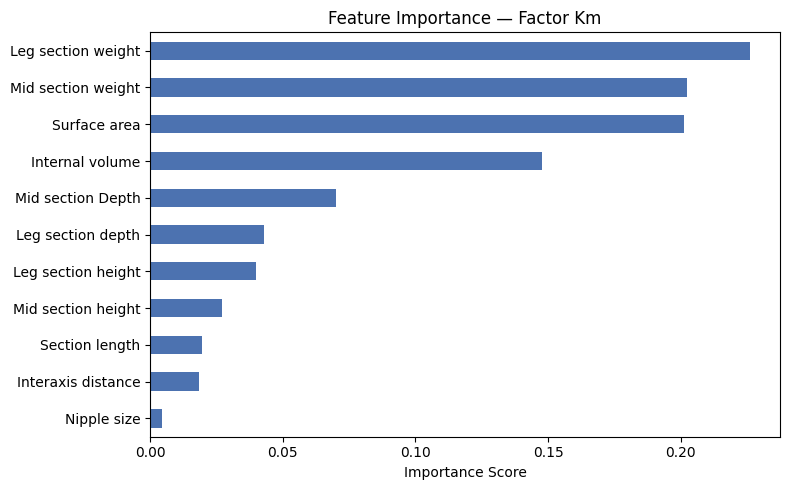

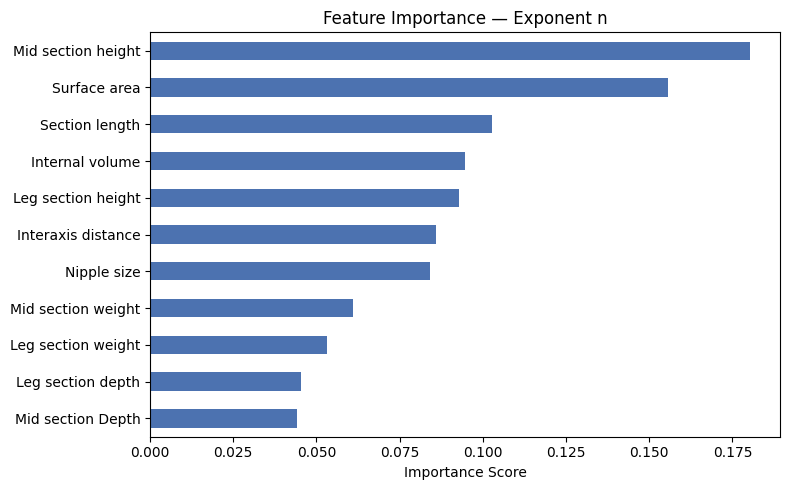

In [175]:
# Getting feature importance for Factor Km model
importance_k = pd.Series(final_rf_k.feature_importances_, index=features).sort_values(ascending=False)
importance_n = pd.Series(final_rf_n.feature_importances_, index=features).sort_values(ascending=False)

print("\nFeature Importance (Factor Km):")
print(importance_k)

print("\nFeature Importance (Exponent n):")
print(importance_n)

# Plotting feature importance
def plot_feature_importance(importances, title):
    plt.figure(figsize=(8, 5))
    importances.plot(kind='barh', color='#4c72b0')
    plt.xlabel('Importance Score')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_feature_importance(importance_k, 'Feature Importance — Factor Km')
plot_feature_importance(importance_n, 'Feature Importance — Exponent n')


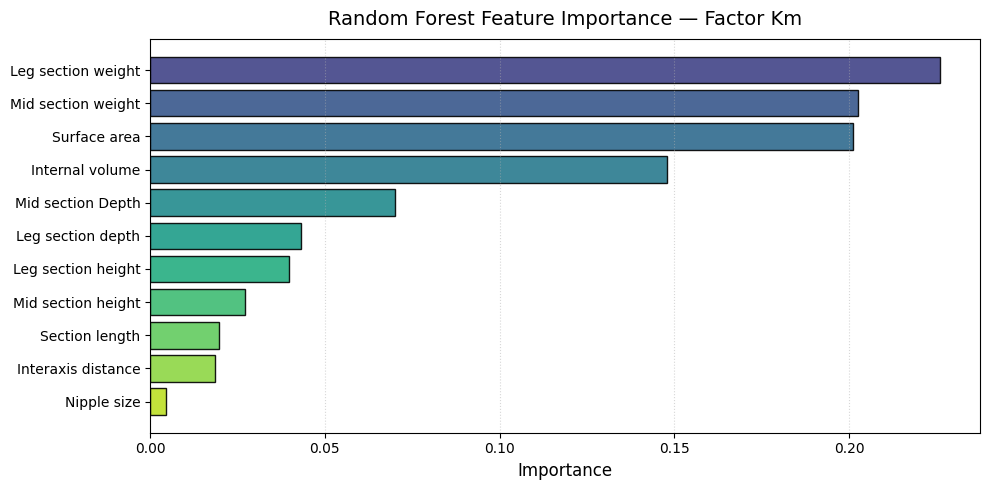

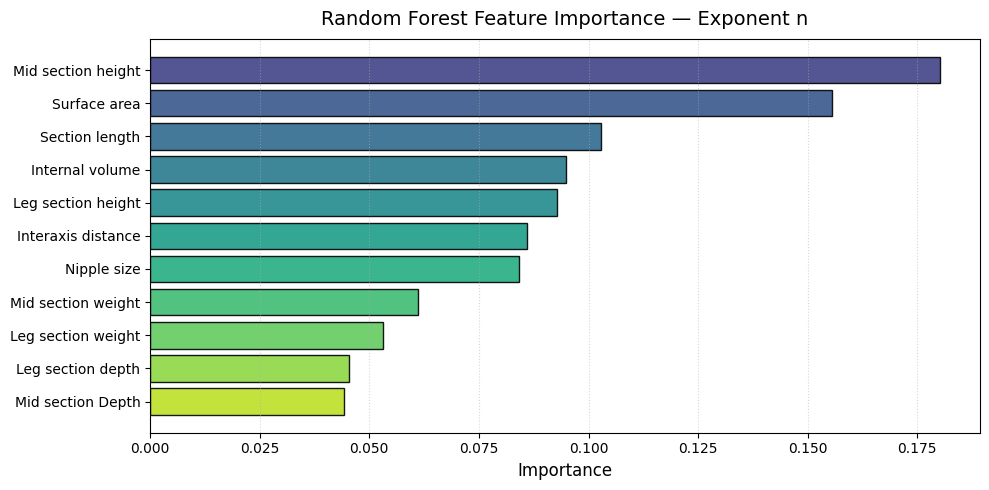

In [176]:
feature_names = X.columns

def plot_feature_importance_colored_viridis(importances, feature_names, title):
    indices = np.argsort(importances)[::-1]
    sorted_names = feature_names[indices]
    sorted_importances = importances[indices]
    colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(sorted_importances)))

    plt.figure(figsize=(10, 5))
    plt.barh(sorted_names, sorted_importances, color=colors, edgecolor='black', alpha=0.9)
    plt.xlabel('Importance', fontsize=12)
    plt.title(title, fontsize=14, pad=10)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Plot for Factor Km
plot_feature_importance_colored_viridis(final_rf_k.feature_importances_, feature_names, 'Random Forest Feature Importance — Factor Km')

# Plot for Exponent n
plot_feature_importance_colored_viridis(final_rf_n.feature_importances_, feature_names, 'Random Forest Feature Importance — Exponent n')


In [177]:
# Calculate mean of predicted Factor Km and Exponent n
mean_k = test['Predicted Factor Km'].mean()
mean_n = test['Predicted Exponent n'].mean()

print(f"Mean Predicted Factor Km: {mean_k:.4f}")
print(f"Mean Predicted Exponent n: {mean_n:.4f}")

Mean Predicted Factor Km: 0.7772
Mean Predicted Exponent n: 1.2564


In [178]:
# Get descriptive statistics for predictions
stats = test[['Predicted Factor Km', 'Predicted Exponent n']].describe()

print(stats)

       Predicted Factor Km  Predicted Exponent n
count           365.000000            365.000000
mean              0.777165              1.256388
std               0.242805              0.022195
min               0.326632              1.221360
25%               0.580285              1.237173
50%               0.755426              1.256366
75%               0.949517              1.272572
max               1.288399              1.298707
